# Covid-19 in South Korea

Data Wrangling module / Capstone project @TuringCollege

## Intro

### Goal

The world is still struggling with one of the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight."

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country have to **create and prove a plan of fighting the pandemics** in your country by analyzing the provided data. You must get the most critical insights using learned data science techniques and present them to the lead of your country.

### Approach

The main focus areas for EDA, that is going to support the plan of fighting COVID-19 pandemic in the future, are:

1. Finding the groups with the most cases
1. Figuring out the causes for the infected groups
1. Determining the case distribution over time based on different criteria
1. Verifying the effectivness of government policies when fighting COVID-19

### Dataset

The link to dataset of Covid-19 in South Korea on Kaggle: https://www.kaggle.com/kimjihoo/coronavirusdataset/

For this analysis 6 datasets were used:
- PatientInfo
- Case
- Policy
- Time
- TimeAge
- TimeGender

***

## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline
plt.rcParams["figure.dpi"] = 200
custom_palette = ["#b2182b", "#ef8a62", "#67a9cf", "#2166ac"]
primary_color = "#b2182b"
secondary_color = "#2166ac"
sns.set_palette(custom_palette)

In [2]:
patient_info = pd.read_csv("coronavirus/PatientInfo.csv")
case = pd.read_csv("coronavirus/Case.csv")

In [3]:
patient_info.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


***

## Data inspection and cleaning

In [4]:
patient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


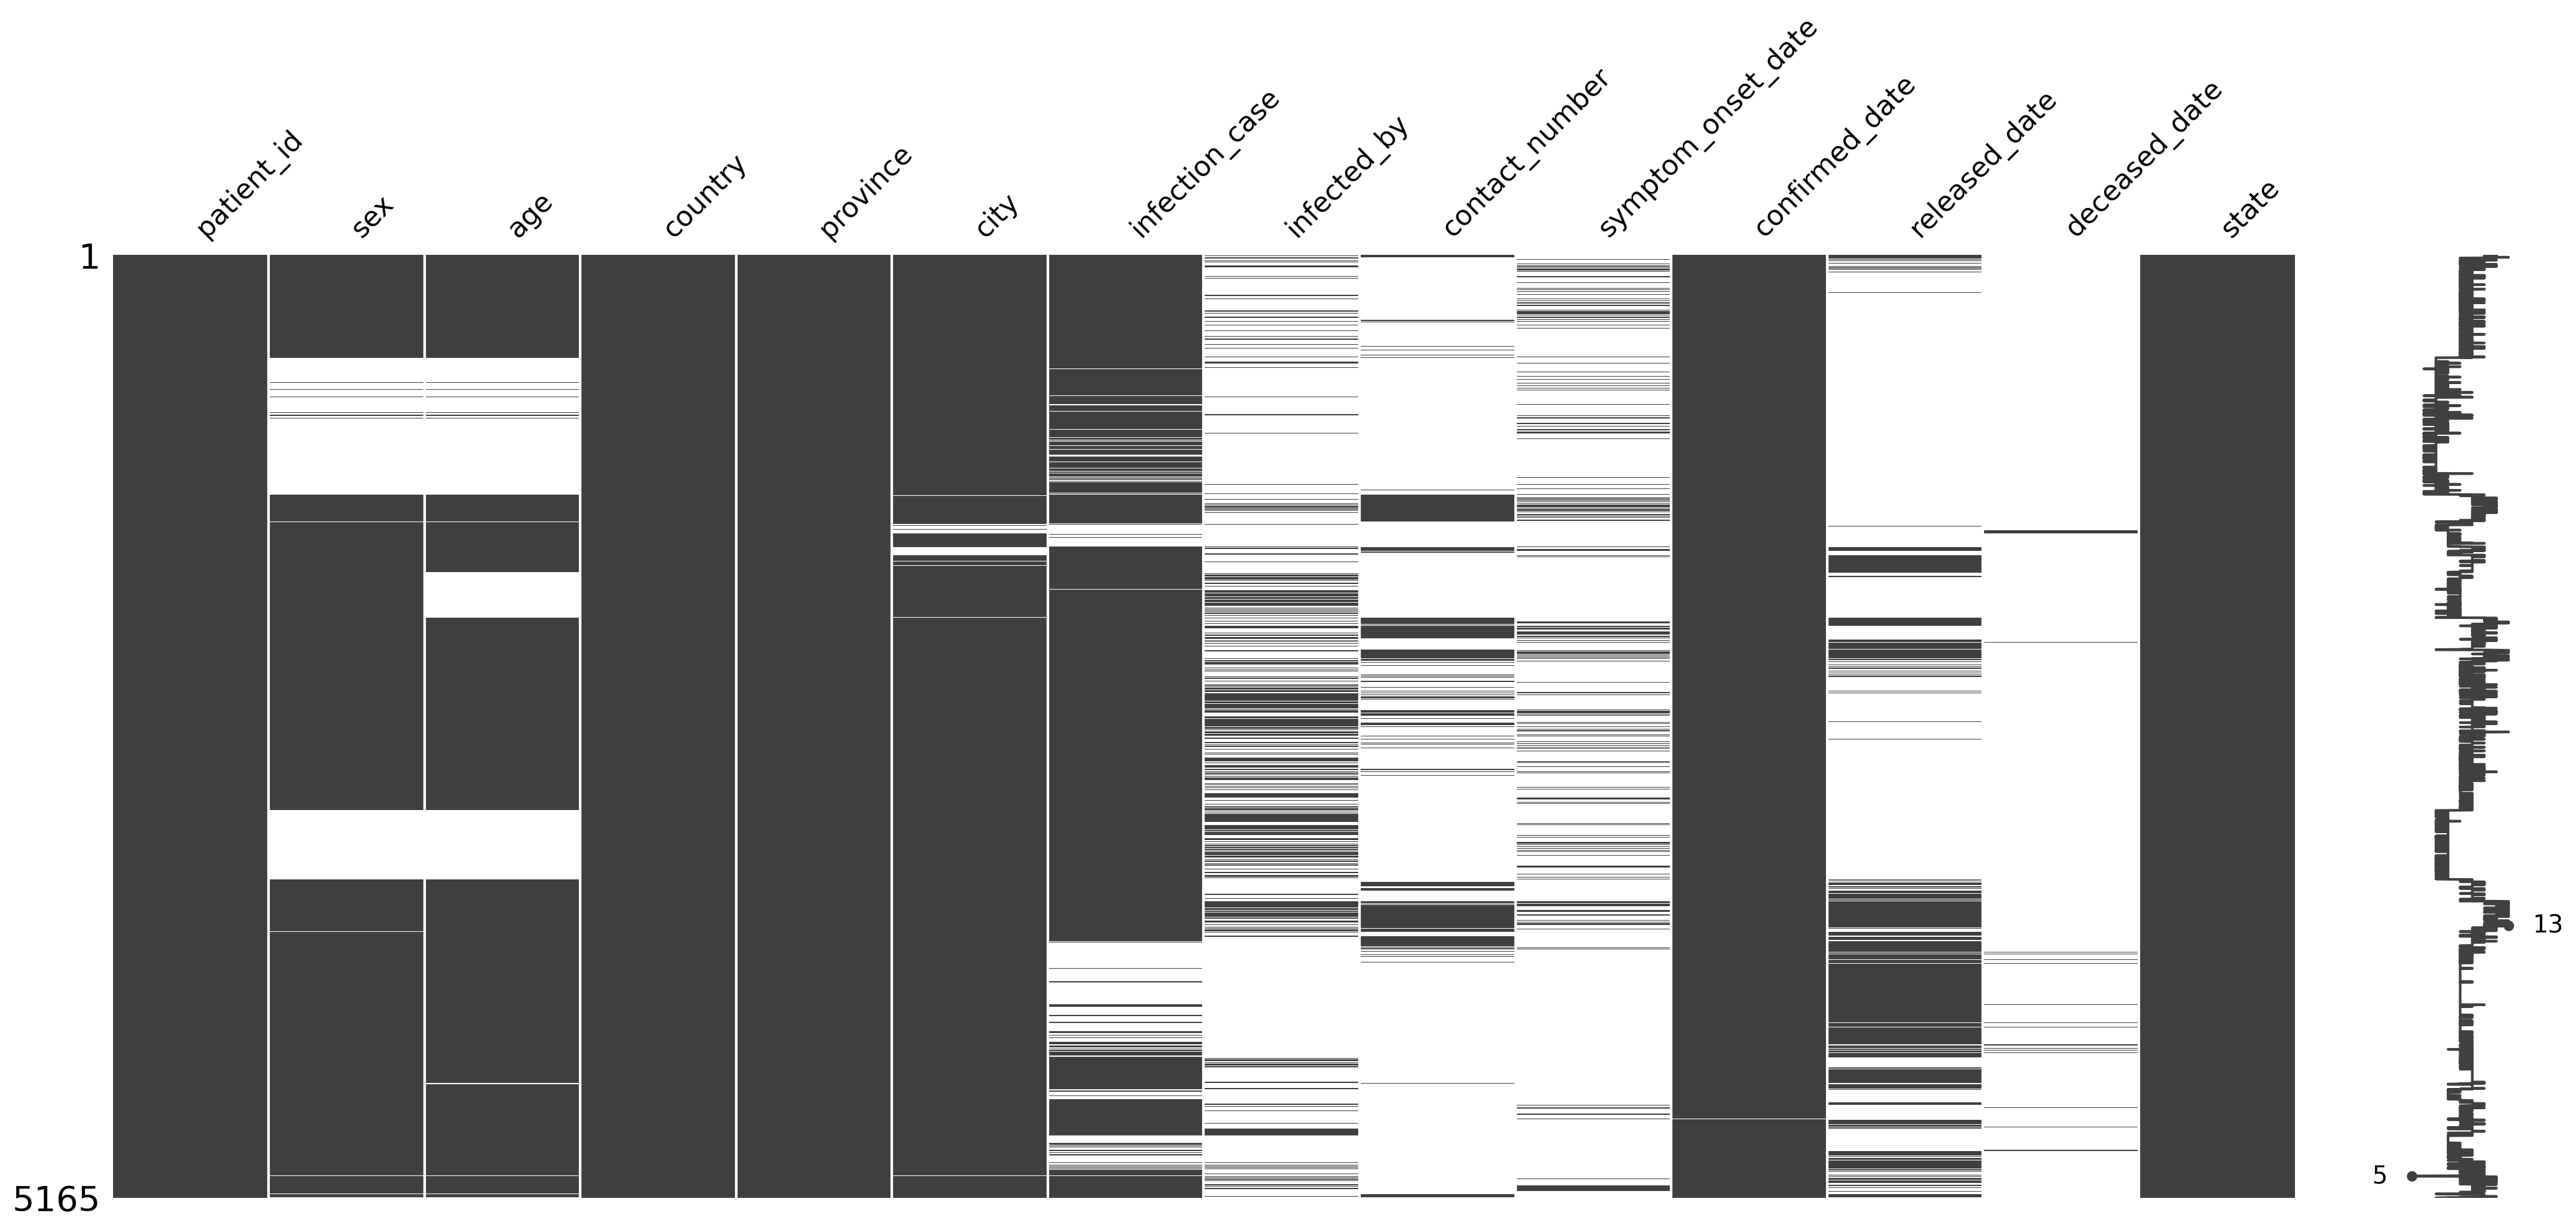

In [5]:
# visualization of missing data (NaN)
nan_in_patient_info = msno.matrix(patient_info)
nan_in_patient_info

plt.show()

### Data converting

Converting to datetime type where possible

In [6]:
patient_info["symptom_onset_date"] = pd.to_datetime(
    patient_info["symptom_onset_date"], errors="coerce"
)
patient_info["confirmed_date"] = pd.to_datetime(patient_info["confirmed_date"])
patient_info["released_date"] = pd.to_datetime(patient_info["released_date"])
patient_info["deceased_date"] = pd.to_datetime(patient_info["deceased_date"])

Creating additional column for age range and converting it to numeric values

In [7]:
patient_info["age_range"] = patient_info["age"].str.rstrip("s")
patient_info["age_range"] = pd.to_numeric(patient_info["age_range"], errors="coerce")

Replacing 'NaN' to 'unknown'

Reasoning: I wanted missing information to be a part of my analysis as data gathering is important in the strategy of fighting pandemic

In [8]:
patient_info[
    ["sex", "age", "country", "province", "city", "infection_case"]
] = patient_info[
    ["sex", "age", "country", "province", "city", "infection_case"]
].fillna(
    value="unknown"
)

Converting column which represents number of contacts to numeric values

In [9]:
patient_info["contact_number"] = pd.to_numeric(
    patient_info["contact_number"], errors="coerce"
)

In [10]:
patient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          5165 non-null   int64         
 1   sex                 5165 non-null   object        
 2   age                 5165 non-null   object        
 3   country             5165 non-null   object        
 4   province            5165 non-null   object        
 5   city                5165 non-null   object        
 6   infection_case      5165 non-null   object        
 7   infected_by         1346 non-null   object        
 8   contact_number      787 non-null    float64       
 9   symptom_onset_date  689 non-null    datetime64[ns]
 10  confirmed_date      5162 non-null   datetime64[ns]
 11  released_date       1587 non-null   datetime64[ns]
 12  deceased_date       66 non-null     datetime64[ns]
 13  state               5165 non-null   object      

In [11]:
patient_info.describe()

,patient_id,contact_number,age_range
count,5.165000e+03,7.870000e+02,3785.000000
mean,2.863635e+09,1.677257e+07,40.367239
std,2.074211e+09,3.093098e+08,20.197162
min,1.000000e+09,0.000000e+00,0.000000
25%,1.000001e+09,2.000000e+00,20.000000
50%,2.000000e+09,4.000000e+00,40.000000
75%,6.001000e+09,1.400000e+01,50.000000
max,7.000000e+09,6.100000e+09,100.000000


#### Insight

Describe method reveals unexpected values in column 'contact_number', as a result this column will be used for outlier detection.

### Outliers - IQR method

In [12]:
Q1 = patient_info["contact_number"].quantile(0.05)
Q3 = patient_info["contact_number"].quantile(0.95)
IQR = Q3 - Q1

lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)

In [13]:
lower_outliers = patient_info[patient_info["contact_number"] <= (lower_whisker)][
    "contact_number"
]
lower_outliers

Series([], Name: contact_number, dtype: float64)

In [14]:
upper_outliers = patient_info[patient_info["contact_number"] >= (upper_whisker)][
    "contact_number"
]
upper_outliers

818     1.000001e+09
1312    1.091000e+03
1318    4.850000e+02
1323    2.960000e+02
1439    1.850000e+02
1463    1.160000e+03
1600    4.500000e+02
2215    4.220000e+02
2218    2.900000e+02
3628    1.740000e+02
5109    6.100000e+09
5110    6.100000e+09
Name: contact_number, dtype: float64

#### Insight
Column 'contact_number' has many missing entries. The outlier analysis shows that there are errors in the data as well. I decided not to use this column for my further analysis.

### Duplicates

In [15]:
patient_info[patient_info.duplicated()]

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,age_range


#### Insight

No duplicates were detected in the dataset

***

## EDA

In [16]:
patient_info.describe(include="object")

,sex,age,country,province,city,infection_case,infected_by,state
count,5165,5165,5165,5165,5165,5165,1346,5165
unique,3,12,16,17,164,52,606,3
top,female,unknown,Korea,Seoul,Gyeongsan-si,contact with patient,2000000205,released
freq,2218,1380,5123,1312,639,1610,51,2929


In [17]:
patient_info.describe(include="datetime", datetime_is_numeric=True)

,symptom_onset_date,confirmed_date,released_date,deceased_date
count,689,5162,1587,66
mean,2020-04-05 05:11:24.470246656,2020-04-10 13:29:16.063555840,2020-04-03 21:15:45.935731712,2020-03-17 01:05:27.272727296
min,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-02-05 00:00:00,2020-02-19 00:00:00
25%,2020-02-29 00:00:00,2020-03-04 00:00:00,2020-03-20 00:00:00,2020-03-02 00:00:00
50%,2020-03-20 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,2020-03-09 00:00:00
75%,2020-05-23 00:00:00,2020-05-27 00:00:00,2020-04-14 00:00:00,2020-03-30 12:00:00
max,2020-06-28 00:00:00,2020-06-30 00:00:00,2020-06-28 00:00:00,2020-05-25 00:00:00


### Patients distribution by gender and age

In [18]:
def set_bar_values(ax, fontsize):

    for ax in ax:
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = f"{int(p.get_height())}"
            ax.text(
                _x,
                _y,
                value,
                verticalalignment="bottom",
                ha="center",
                fontsize=fontsize,
                fontweight="semibold",
            )

In [19]:
def set_labels(ax, title, xlabel, ylabel):

    title = title.capitalize()
    xlabel = xlabel.capitalize()
    ylabel = ylabel.capitalize()

    ax.set_title(title, pad=20, fontsize=13, fontweight="semibold")
    ax.set_xlabel(xlabel, labelpad=12, fontweight="semibold")
    ax.set_ylabel(ylabel, fontweight="semibold")

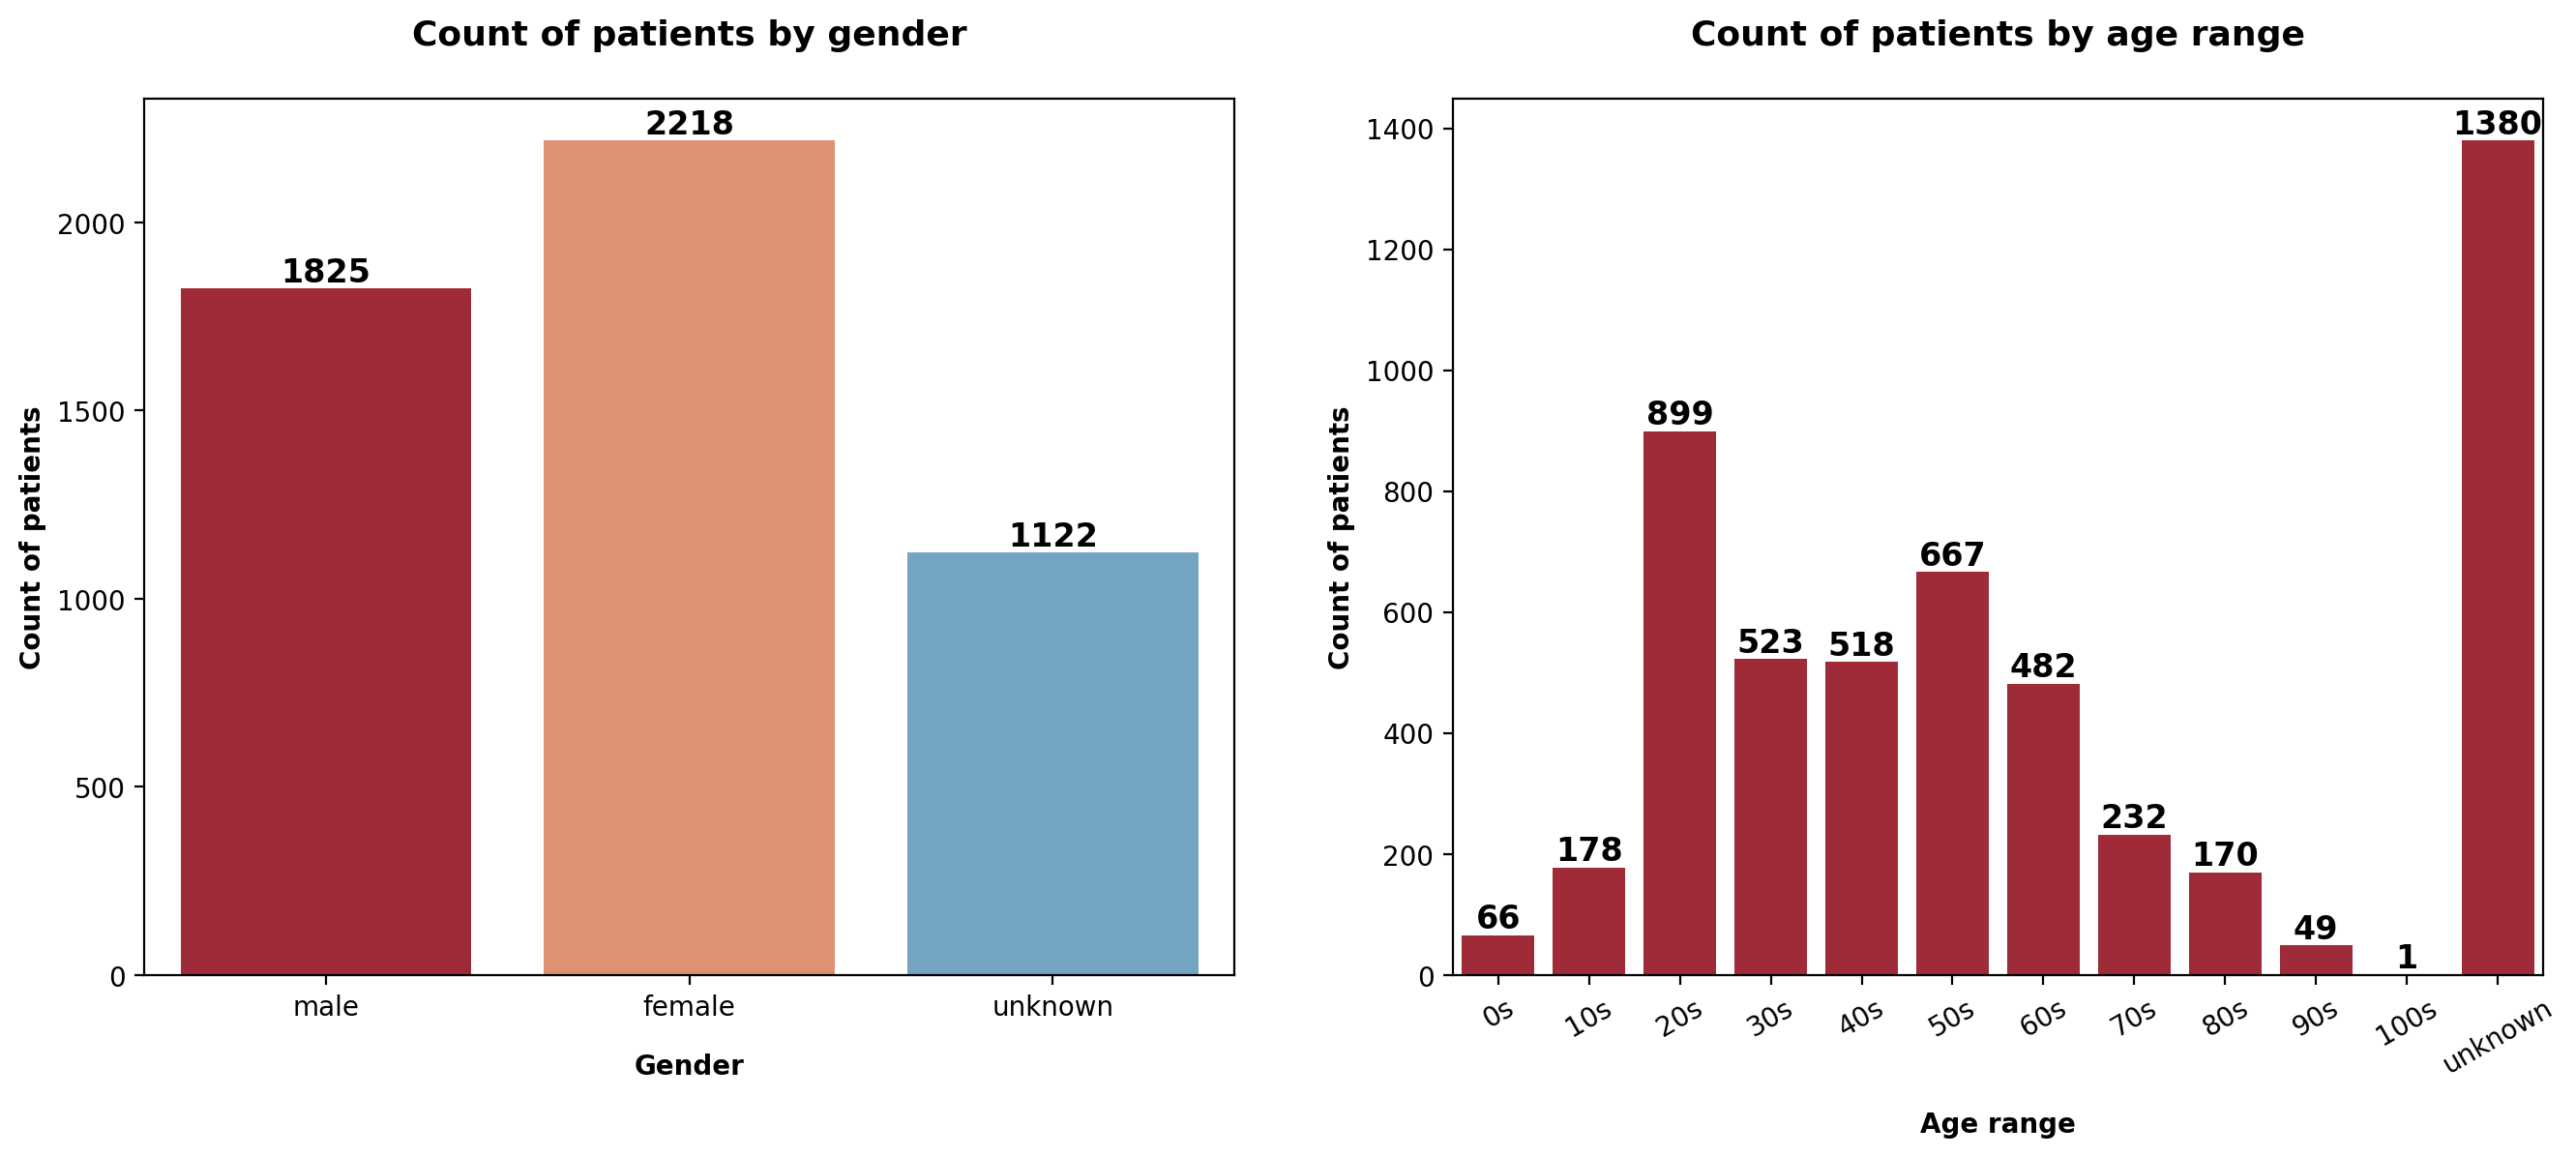

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x="sex", data=patient_info, ax=ax[0])
set_labels(ax[0], "count of patients by gender", "gender", "count of patients")

sns.countplot(
    x="age",
    data=patient_info,
    ax=ax[1],
    color=primary_color,
    order=[
        "0s",
        "10s",
        "20s",
        "30s",
        "40s",
        "50s",
        "60s",
        "70s",
        "80s",
        "90s",
        "100s",
        "unknown",
    ],
)
set_labels(ax[1], "count of patients by age range", "age range", "count of patients")

set_bar_values(ax, "large")

plt.xticks(rotation=30)
plt.show()

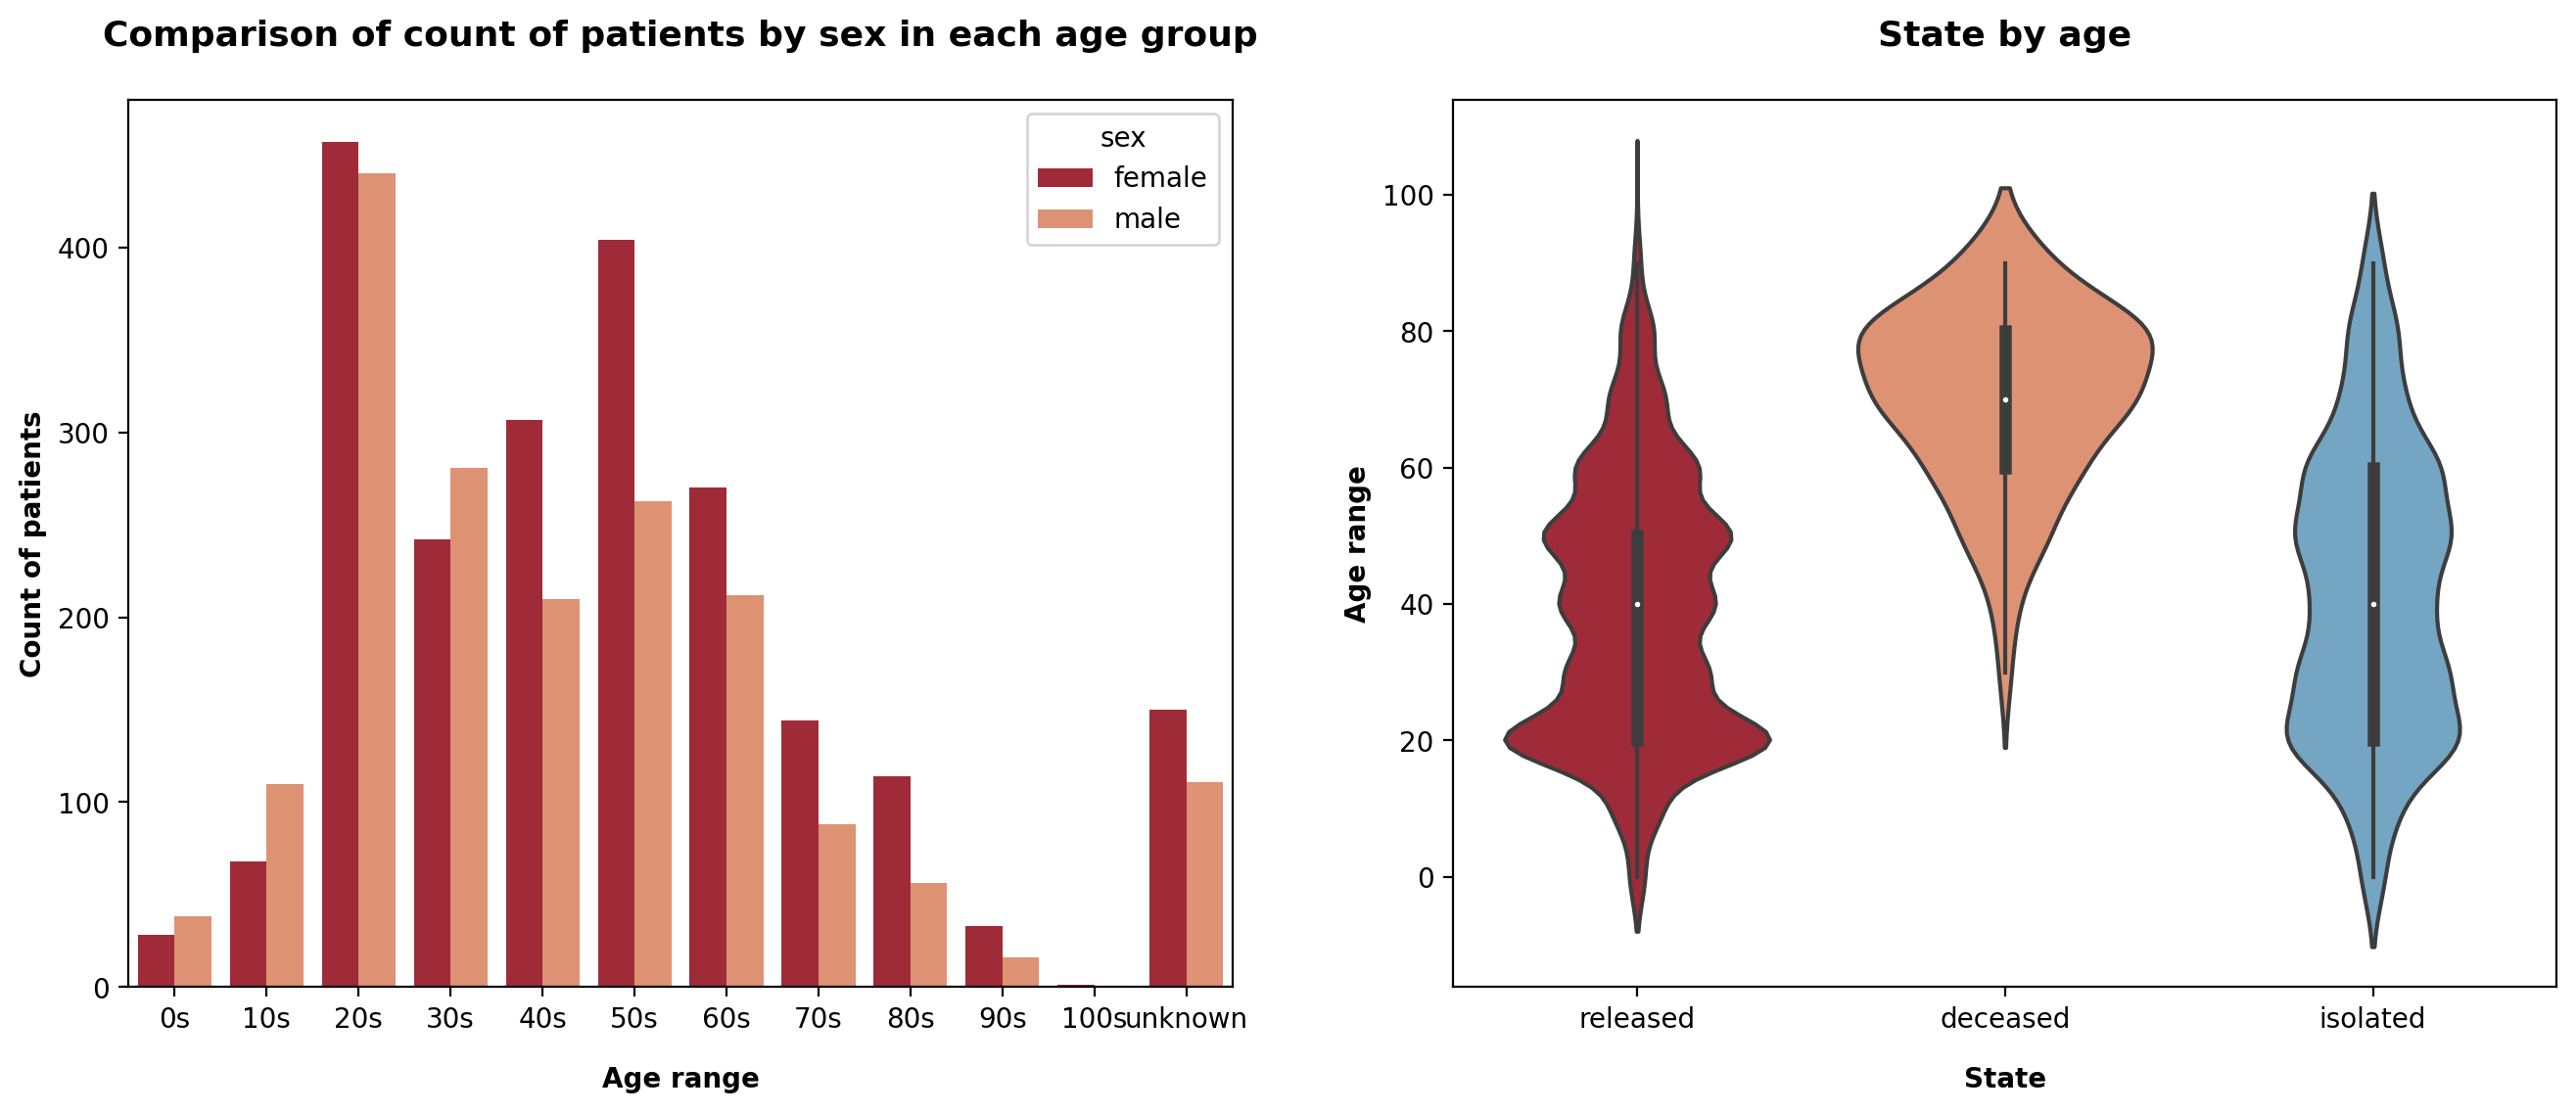

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

patients_age_sex = patient_info.groupby(["sex", "age"]).agg(count=("age", "count"))
patients_age_sex.drop(labels="unknown", axis=0, inplace=True)
patients_age_sex.reset_index(inplace=True)

sns.barplot(
    x="age",
    y="count",
    hue="sex",
    data=patients_age_sex,
    order=[
        "0s",
        "10s",
        "20s",
        "30s",
        "40s",
        "50s",
        "60s",
        "70s",
        "80s",
        "90s",
        "100s",
        "unknown",
    ],
    ax=ax[0],
)
set_labels(
    ax[0],
    "comparison of count of patients by sex in each age group",
    "age range",
    "count of patients",
)

sns.violinplot(x="state", y="age_range", data=patient_info, ax=ax[1])
set_labels(ax[1], "state by age", "state", "age range")

plt.show()

#### Insights

1. There is a lot of missing data for gender and age. Further insights will exclude unknowns.
1. There are more infected female patients than man.
1. People in their 20s are the most affected.
1. When analyzed by gender and age, two most infected groups appear:
    - Females and males in their 20s
    - Females in their 50s
1. People in their 20s are more likely to be released whereas people older than 60 are more likely to be deceased.

***

### Infection cases/sites

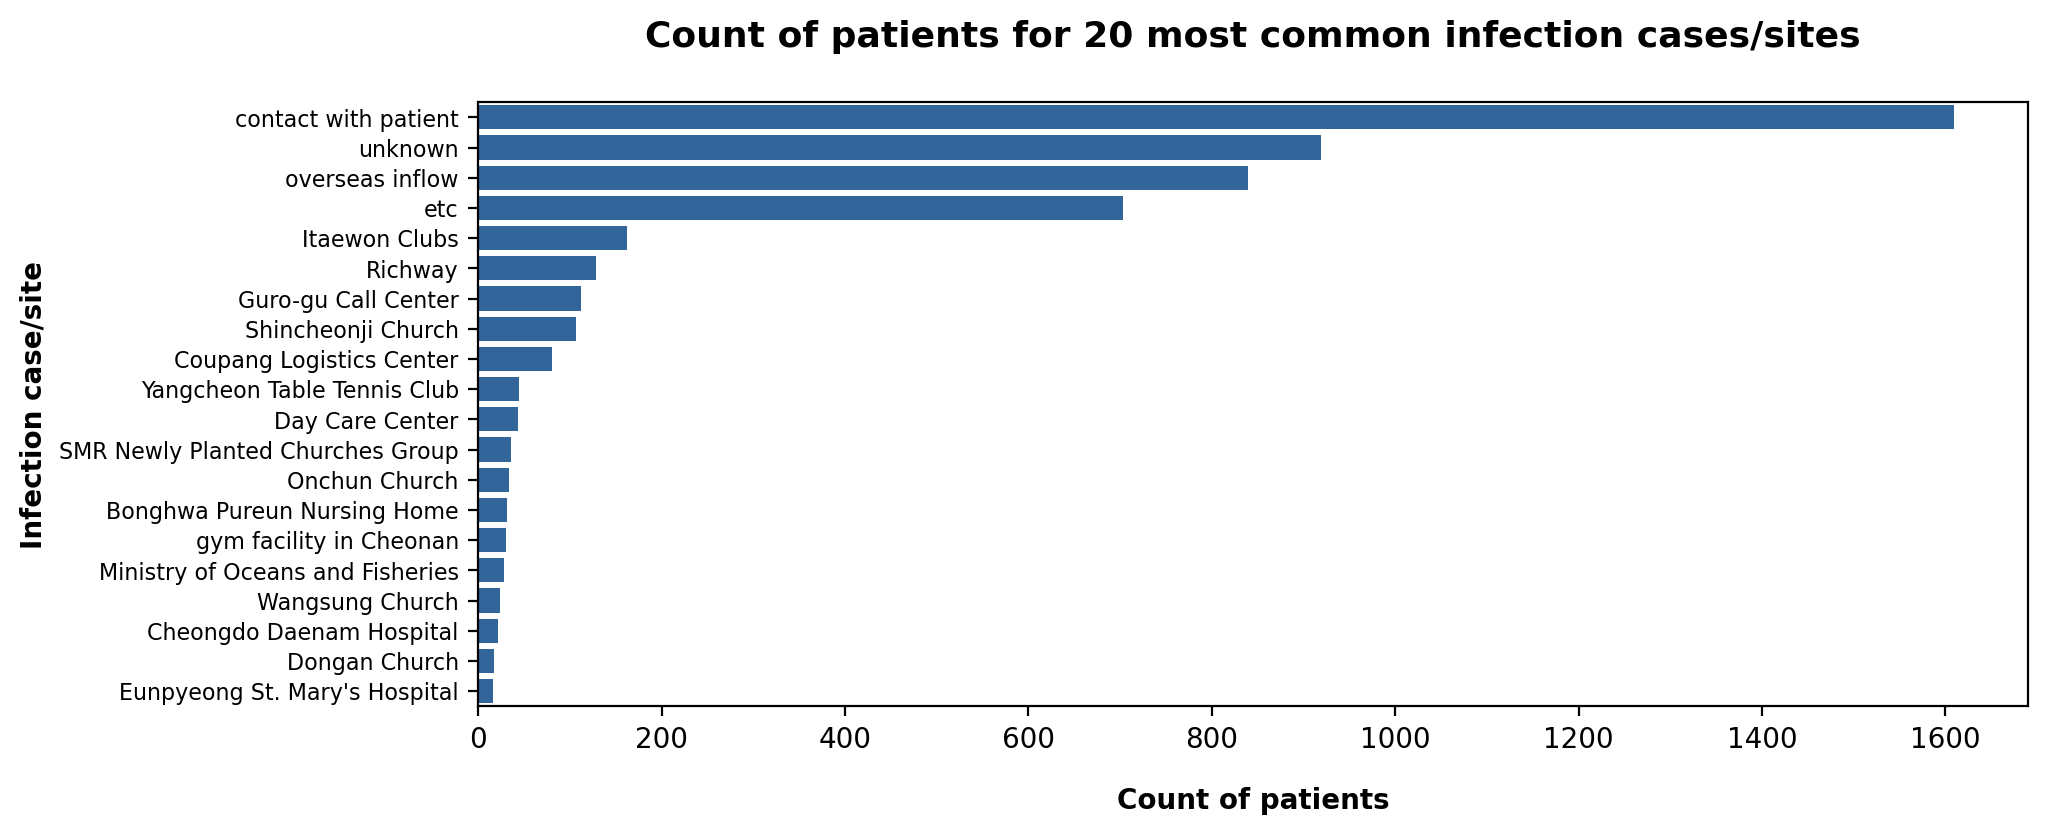

In [22]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.countplot(
    y="infection_case",
    data=patient_info,
    ax=ax,
    color=secondary_color,
    order=patient_info["infection_case"].value_counts().iloc[:20].index,
)
set_labels(
    ax,
    "Count of patients for 20 most common infection cases/sites",
    "count of patients",
    "infection case/site",
)

plt.yticks(fontsize=8)
plt.show()

#### Insights

1. Column 'infection_case' has a lot of missing data in a form of 'unknown' or 'etc'. Strategy for fighting COVID-19 should include more thorough data gathering especially when dealing with infection causes.
1. Excluding missing data, two main sources for infection were identified:

    - contact with patient
    - overseas inflow

### Infection cases for most infected groups

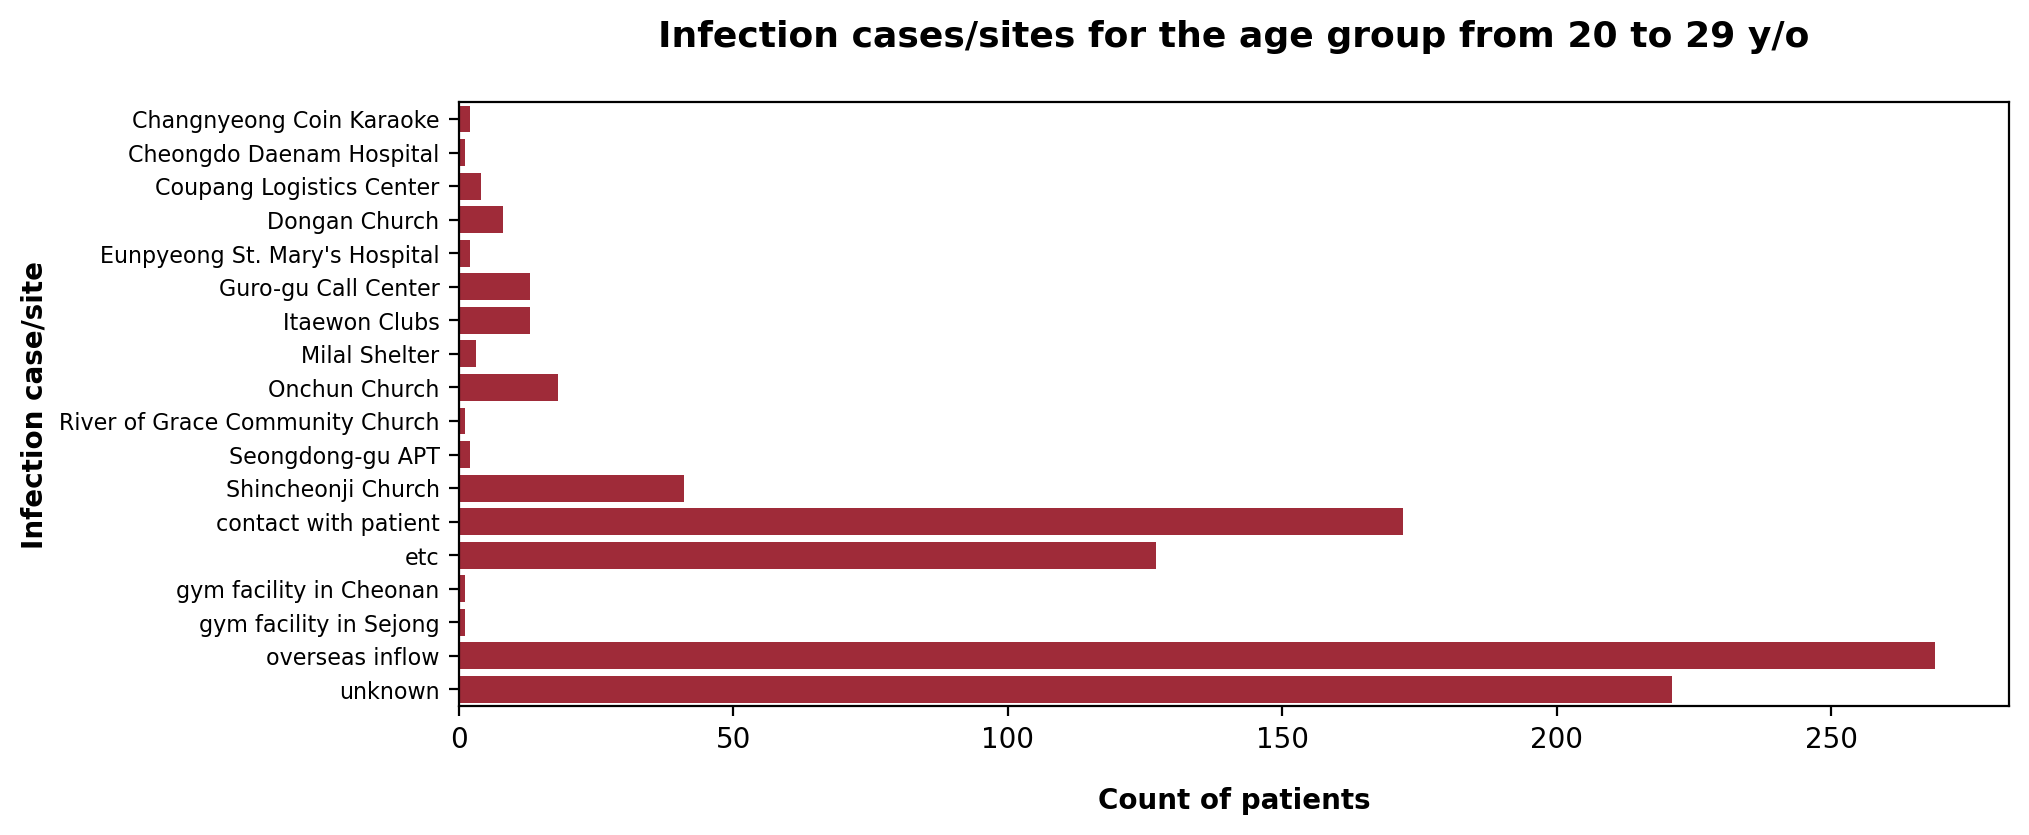

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))

twenties_infect_cases = (
    patient_info.loc[patient_info["age"] == "20s"]
    .groupby("infection_case")
    .agg(count=("patient_id", "count"))
)

sns.barplot(
    y=twenties_infect_cases.index,
    x="count",
    data=twenties_infect_cases,
    color=primary_color,
)
set_labels(
    ax,
    "Infection cases/sites for the age group from 20 to 29 y/o",
    "count of patients",
    "infection case/site",
)

plt.yticks(fontsize=8)
plt.show()

In [24]:
twenties_infect_cases_male = (
    patient_info.loc[(patient_info["age"] == "20s") & (patient_info["sex"] == "male")]
    .groupby("infection_case")["patient_id"]
    .agg("count")
)

twenties_infect_cases_male.sort_values(ascending=False).head(3)

infection_case
overseas inflow         125
unknown                 108
contact with patient     80
Name: patient_id, dtype: int64

In [25]:
twenties_infect_cases_female = (
    patient_info.loc[(patient_info["age"] == "20s") & (patient_info["sex"] == "female")]
    .groupby("infection_case")["patient_id"]
    .agg("count")
)

twenties_infect_cases_female.sort_values(ascending=False).head(3)

infection_case
overseas inflow         143
unknown                 113
contact with patient     92
Name: patient_id, dtype: int64

#### Insights

1. The leading cause for infection in patients in their 20s is overseas inflow
2. No significant difference in infection causes between males and females in their 20s

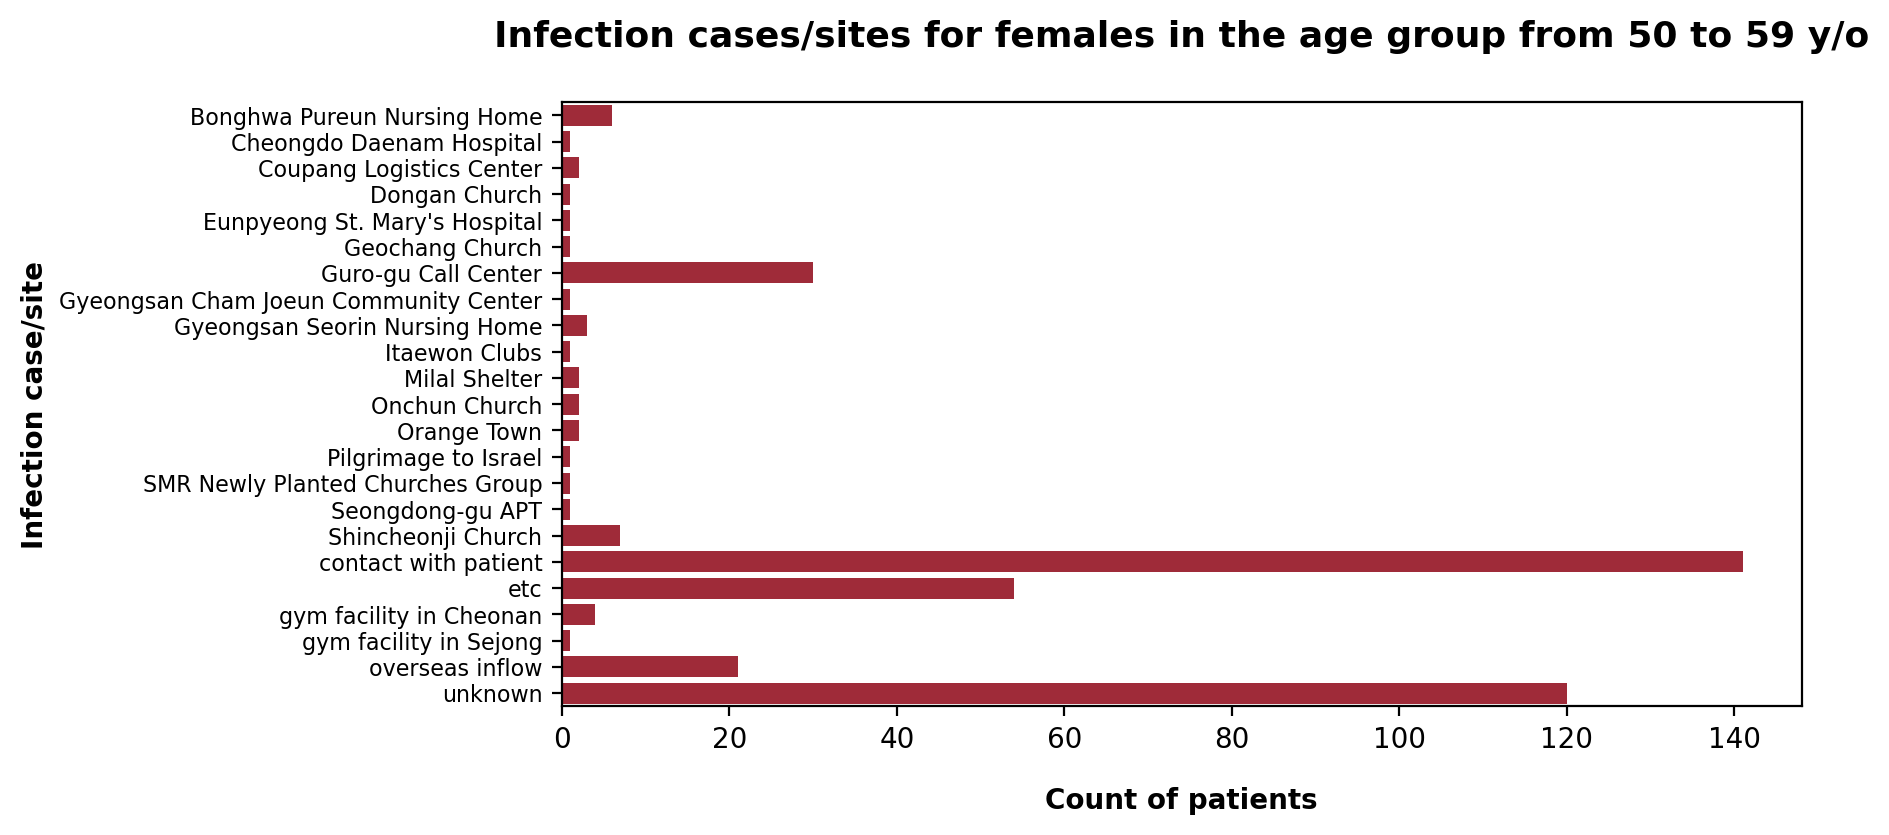

In [26]:
fig, ax = plt.subplots(figsize=(8, 4))

forties_infect_cases = (
    patient_info.loc[(patient_info["age"] == "50s") & (patient_info["sex"] == "female")]
    .groupby("infection_case")
    .agg(count=("patient_id", "count"))
)

sns.barplot(
    y=forties_infect_cases.index,
    x="count",
    data=forties_infect_cases,
    color=primary_color,
)
set_labels(
    ax,
    "Infection cases/sites for females in the age group from 50 to 59 y/o",
    "count of patients",
    "infection case/site",
)

plt.yticks(fontsize=8)
plt.show()

#### Insights

1. The leading cause for infection in female patients in their 50s is contact with patients

***

### Reporting period

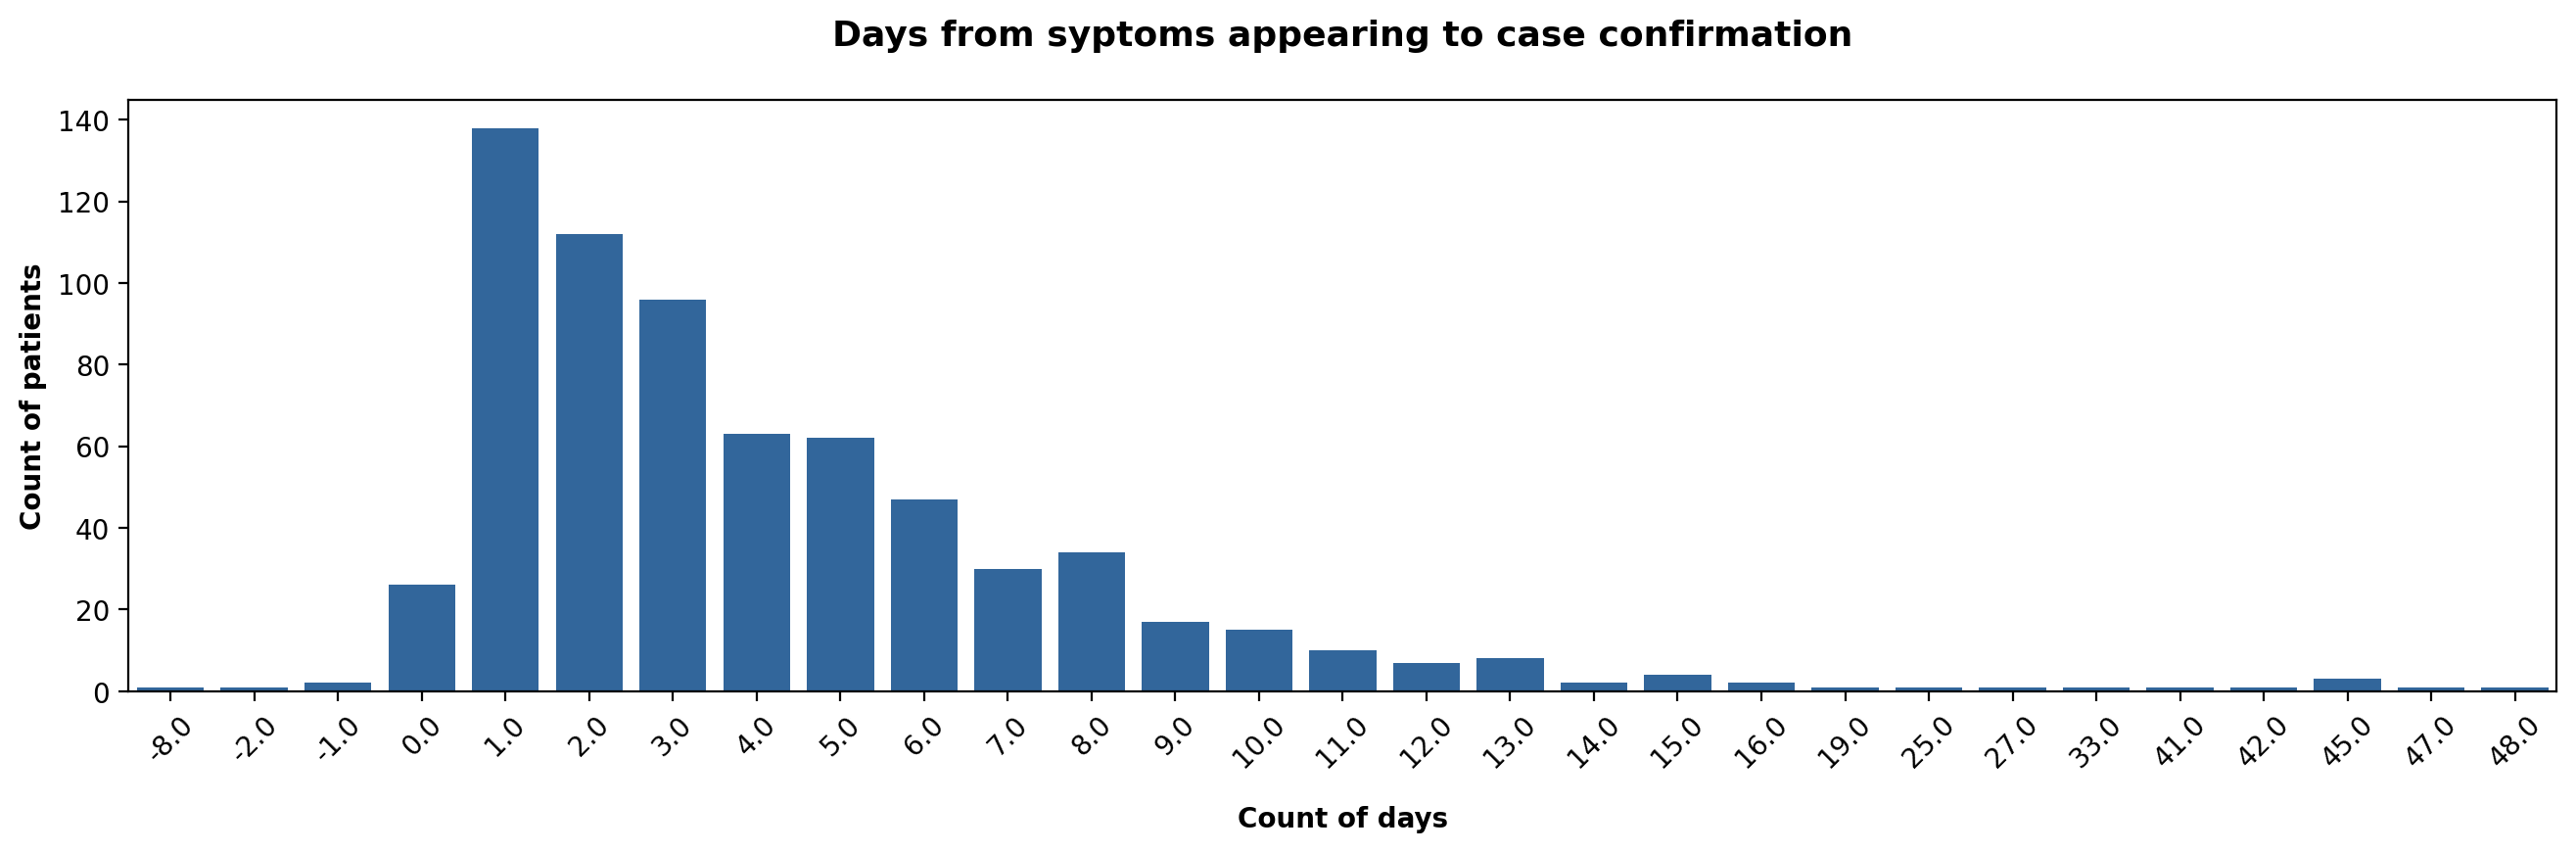

In [27]:
fig, ax = plt.subplots(figsize=(16, 4))

patient_info["reporting_period"] = (
    patient_info["confirmed_date"] - patient_info["symptom_onset_date"]
).dt.days

sns.countplot(x="reporting_period", data=patient_info, color=secondary_color)
set_labels(
    ax,
    "Days from syptoms appearing to case confirmation",
    "count of days",
    "count of patients",
)

plt.xticks(rotation=45)
plt.show()

In [28]:
total_patients_with_symptoms = patient_info["reporting_period"].count()

total_patients_with_symptoms

688

In [29]:
over_one_day_report_period = patient_info[
    (patient_info["reporting_period"] != 1) & (patient_info["reporting_period"] != 0)
]["reporting_period"].count()

over_one_day_report_period

524

#### Insights

1. The dataset lacks data about symptoms over time which makes a bit difficult to make reliable conclusions from calculating time from syptoms appearing to case confirmation 
1. The plan for fighting COVID-19 should include more thorough data gathering about symptoms over time
1. 524 out of 688 patients (76%) have more than one day period from symptoms appearing to case confirmation
1. It is difficult to determine the reasoning behind this:
    - patients might delay taking the test
    - the initial procedures could have been slow at confirming cases

***

### Group cases

In [30]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


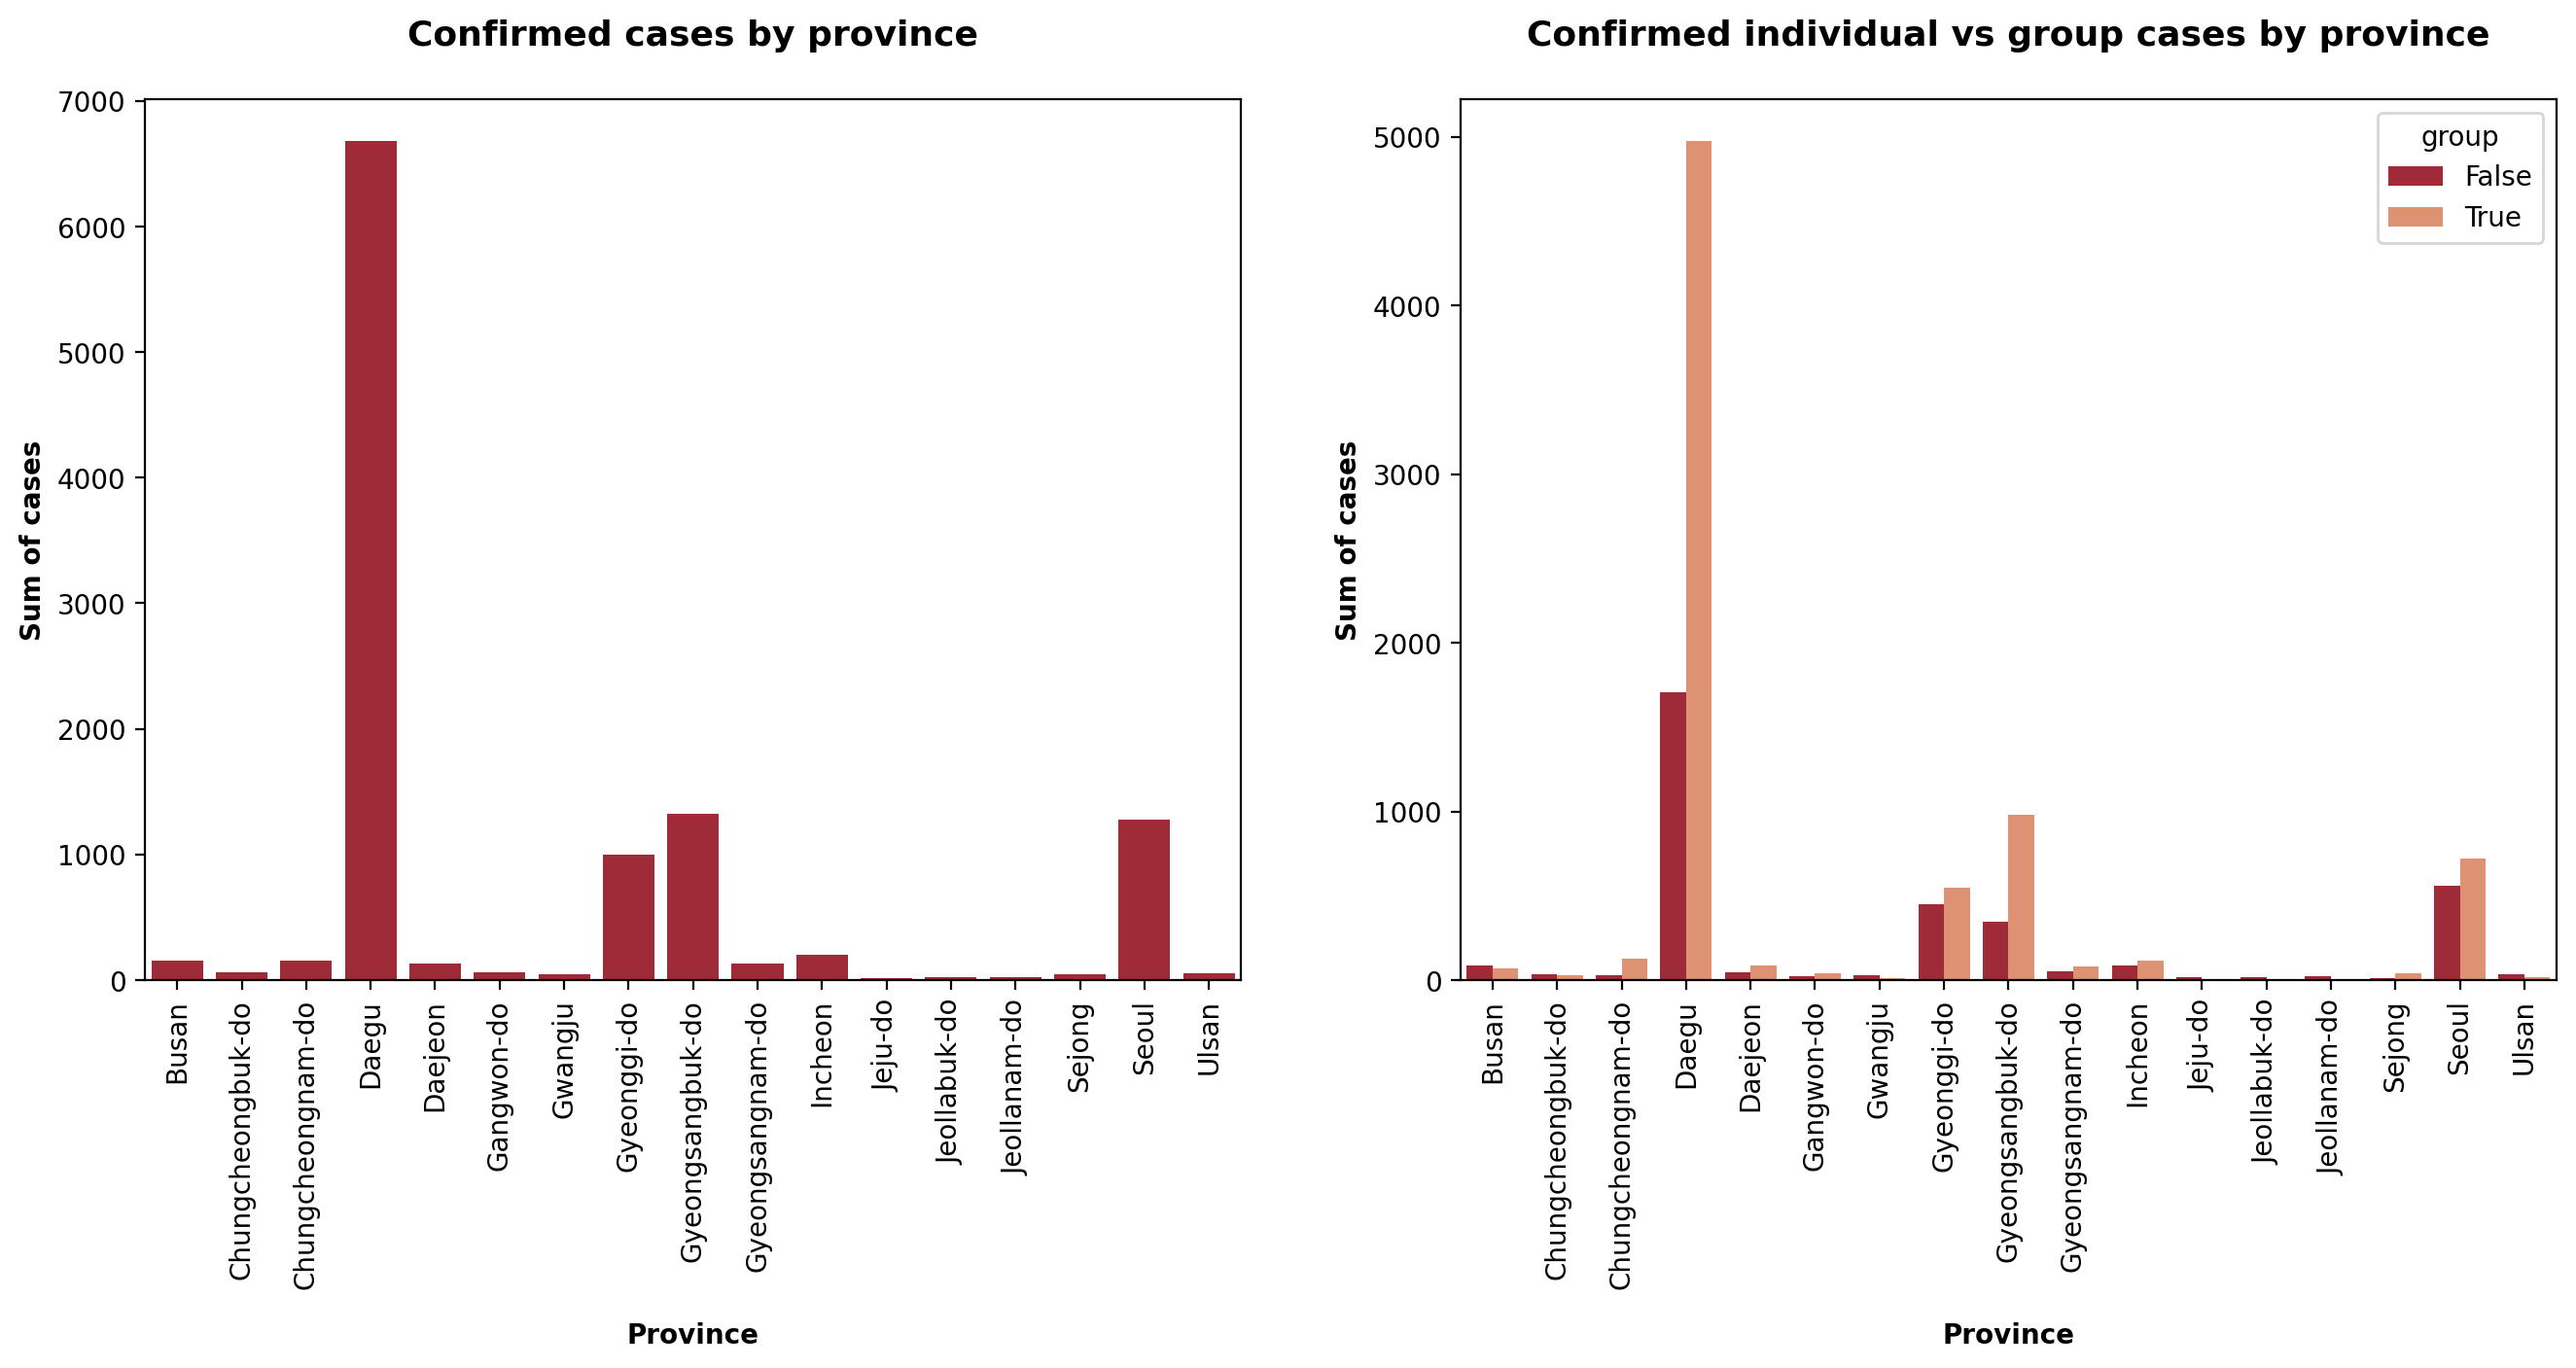

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

confirmed_by_province = case.groupby("province").agg(sum=("confirmed", "sum"))
sns.barplot(
    x=confirmed_by_province.index,
    y="sum",
    data=confirmed_by_province,
    ax=ax[0],
    color=primary_color,
)
set_labels(ax[0], "confirmed cases by province", "province", "sum of cases")
ax[0].tick_params(axis="x", rotation=90)

confirmed_by_group_in_province = case.groupby(["province", "group"]).agg(
    sum=("confirmed", "sum")
)
confirmed_by_group_in_province.reset_index(inplace=True)
sns.barplot(
    x="province", y="sum", hue="group", data=confirmed_by_group_in_province, ax=ax[1]
)
set_labels(
    ax[1], "confirmed individual vs group cases by province", "province", "sum of cases"
)
ax[1].tick_params(axis="x", rotation=90)

plt.show()

In [32]:
most_infected_province = confirmed_by_province["sum"].nlargest(4)

most_infected_province

province
Daegu               6680
Gyeongsangbuk-do    1324
Seoul               1280
Gyeonggi-do         1000
Name: sum, dtype: int64

In [33]:
confirmed_by_group_in_province.loc[
    confirmed_by_group_in_province["province"].isin(
        most_infected_province.index.to_list()
    )
].set_index("province")

,group,sum
province,,
Daegu,False,1705
Daegu,True,4975
Gyeonggi-do,False,452
Gyeonggi-do,True,548
Gyeongsangbuk-do,False,345
Gyeongsangbuk-do,True,979
Seoul,False,560
Seoul,True,720


In [34]:
max_individual_infection_causes = (
    case.loc[(case["group"] == False)]
    .groupby("infection_case")
    .agg(sum=("confirmed", "sum"))
)

max_individual_infection_causes

,sum
infection_case,
contact with patient,1403
etc,1192
overseas inflow,949


In [35]:
max_group_infection_causes = case.loc[
    (case["group"] == True) & (case["confirmed"] > 50)
][["infection_case", "confirmed"]].set_index("infection_case")

max_group_infection_causes

,confirmed
infection_case,
Itaewon Clubs,139
Richway,119
Guro-gu Call Center,95
Shincheonji Church,4511
Second Mi-Ju Hospital,196
Hansarang Convalescent Hospital,124
Daesil Convalescent Hospital,101
Itaewon Clubs,53
Door-to-door sales in Daejeon,55


#### Insights

1. The four provinces stand out by high number of infection cases: 
    - Daegu
    - Gyeongsangbuk-do
    - Seoul
    - Gyeonggi-do
1. Comparing individual vs group cases in the four most infected provinces, it becomes clear that group cases effects much more people meaning that sites/locations for group/mass gathering should be controlled during pandemic
1. Infection cause for individual cases correlates with data in 'patient_info' dataset - contact with patient is the most common cause
1. Seems that infection cause for group cases covers a variety of sites/locations that could be arranged together and analyzed in more detail way

### High risk areas for group infections

In [36]:
area_to_site = {
    "religious sites": ["church", "temple"],
    "hospitals": ["hospital", "medical"],
    "community centers": ["shelter", "community center", "culture center"],
    "workplace": [
        "call center",
        "logistics center",
        "company",
        "manufacture",
        "insurance",
        "orange life",
    ],
    "fitness centers": ["gym", "tennis club"],
    "door-to-door sales": ["door", "richway", "daezayeon korea"],
    "government facilities": ["ministry"],
    "nursing homes": ["nursing home"],
    "nightclubs": ["clubs"],
    "education facilities": [
        "class",
        "study",
        "learning",
        "academy",
        "institute",
        "laboratory",
    ],
    "accomodation facilities": [
        "seocho family",
        "seongdong-gu apt",
        "apartments",
        "goesan-gun",
    ],
    "child care facilities": ["day care center", "kindergarten"],
    "shopping centers": ["town"],
}


def assign_bin(x):
    x = x.lower()

    for key, values in area_to_site.items():
        for item in values:
            if item in x:
                return key

    return "unidentified"


case["high_risk_areas"] = case["infection_case"].apply(assign_bin)

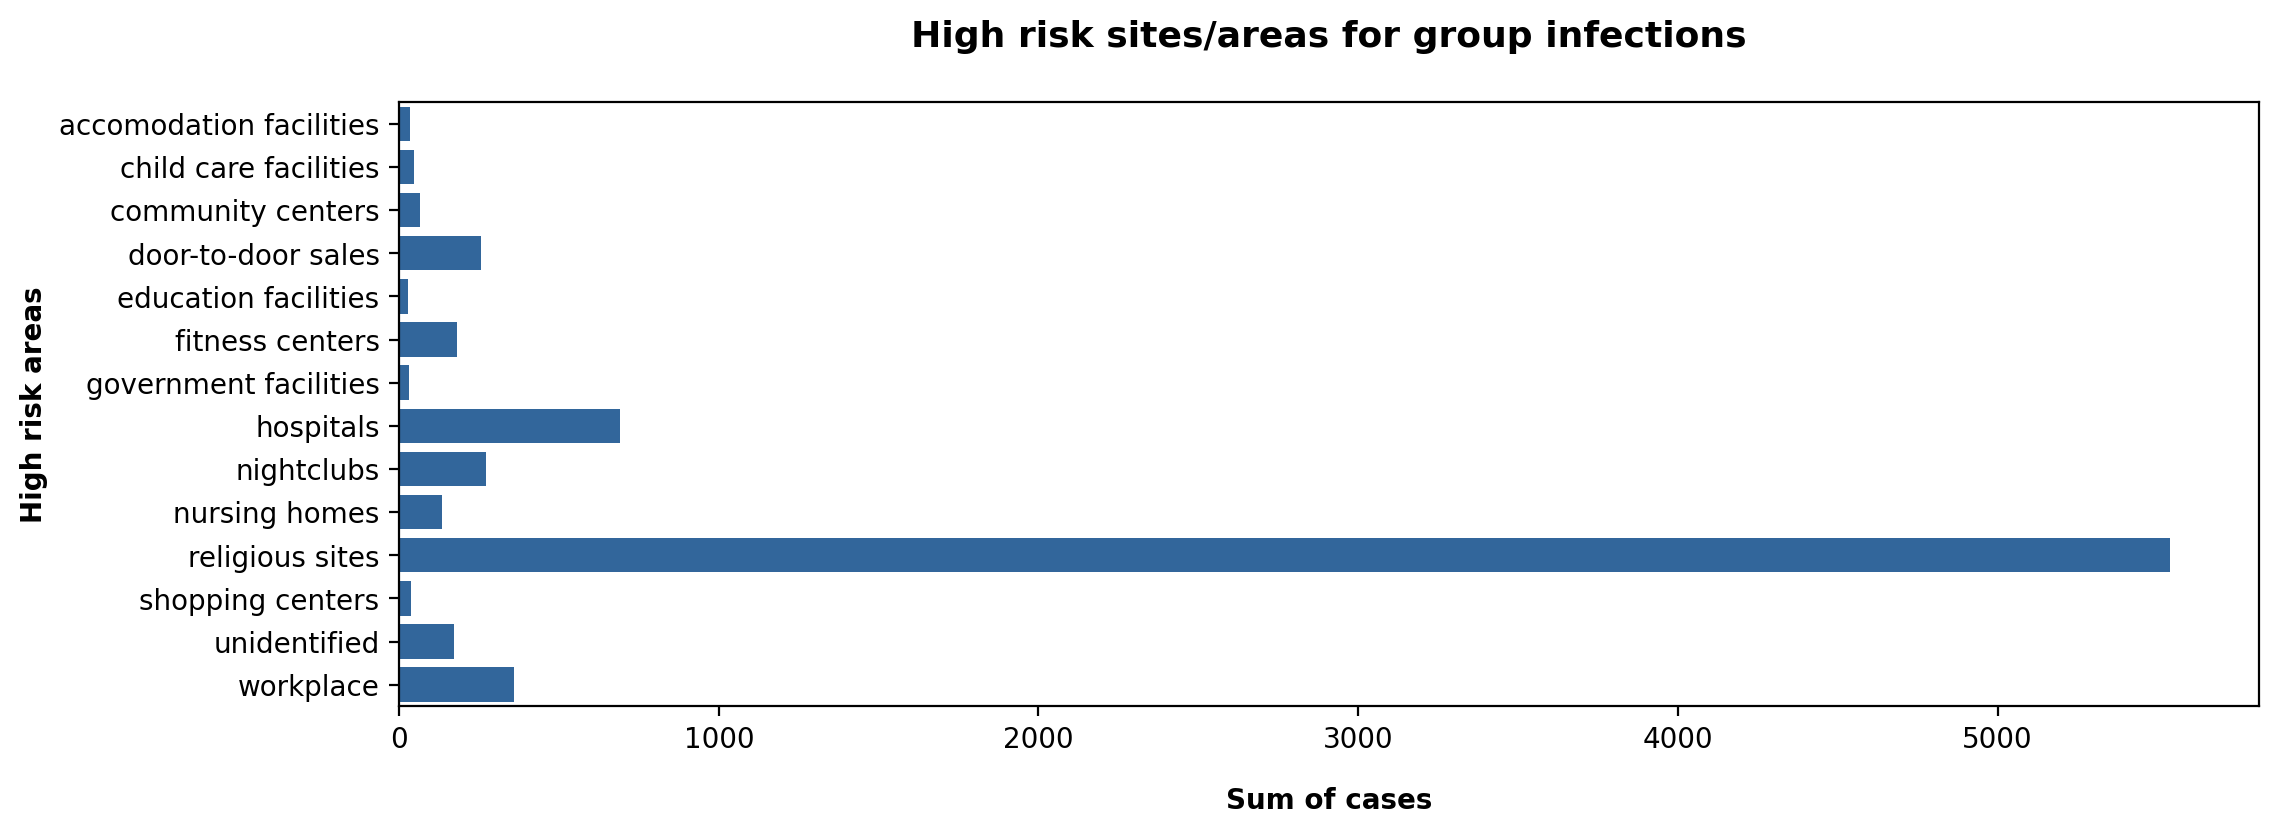

In [37]:
fig, ax = plt.subplots(figsize=(12, 4))

confirmed_by_area = (
    case[case["group"] == True].groupby("high_risk_areas").agg(sum=("confirmed", "sum"))
)
sns.barplot(
    y=confirmed_by_area.index, x="sum", data=confirmed_by_area, color=secondary_color
)
set_labels(
    ax, "High risk sites/areas for group infections", "sum of cases", "high risk areas"
)

plt.show()

In [56]:
over_fifty_cases = case.loc[(case["group"] == True) & (case["confirmed"] > 50)][
    ["province", "city", "high_risk_areas", "confirmed"]
].set_index(["province", "city"])

over_fifty_cases

high_risk_areas  confirmed
province          city                                          
Seoul             Yongsan-gu               nightclubs        139
                  Gwanak-gu        door-to-door sales        119
                  Guro-gu                   workplace         95
Daegu             Nam-gu              religious sites       4511
                  Dalseong-gun              hospitals        196
                  Seo-gu                    hospitals        124
                  Dalseong-gun              hospitals        101
Incheon           from other city          nightclubs         53
Daejeon           -                door-to-door sales         55
Gyeonggi-do       Seongnam-si         religious sites         67
                  Bucheon-si                workplace         67
                  from other city          nightclubs         59
                  from other city  door-to-door sales         58
Chungcheongnam-do Cheonan-si          fitness centers        103
Gyeongsangbuk-do  from other city     religious sites        566
                  Cheongdo-gun              hospitals        119
                  Bonghwa-gun           nursing homes         68
                  Gyeongsan-si          nursing homes         66

#### Insights

1. High risk areas for group infections with most cases:
    - Religious sites (churches, temples,etc)
    - Hospitals
    - Workplace
1. During pandemic high risk areas fro group infection should be monitored closely and should be prioritized in setting up restrictions. It is also helpful to take into account which areas are most risky for each province (and even city) and apply restrictions accordingly.

***

### Confirmed cases over time

In [39]:
time_age = pd.read_csv("coronavirus/TimeAge.csv")
time_gender = pd.read_csv("coronavirus/TimeGender.csv")
time = pd.read_csv("coronavirus/Time.csv")
policy = pd.read_csv("coronavirus/Policy.csv")

In [40]:
time["date"] = pd.to_datetime(time["date"])
time_age["date"] = pd.to_datetime(time_age["date"])
time_gender["date"] = pd.to_datetime(time_gender["date"])
policy["start_date"] = pd.to_datetime(policy["start_date"])
policy["end_date"] = pd.to_datetime(policy["end_date"], errors="coerce")

In [41]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [42]:
first_case = time["date"].dt.date.min()
first_case

datetime.date(2020, 1, 20)

In [43]:
last_registered_case = time["date"].dt.date.max()
last_registered_case

datetime.date(2020, 6, 30)

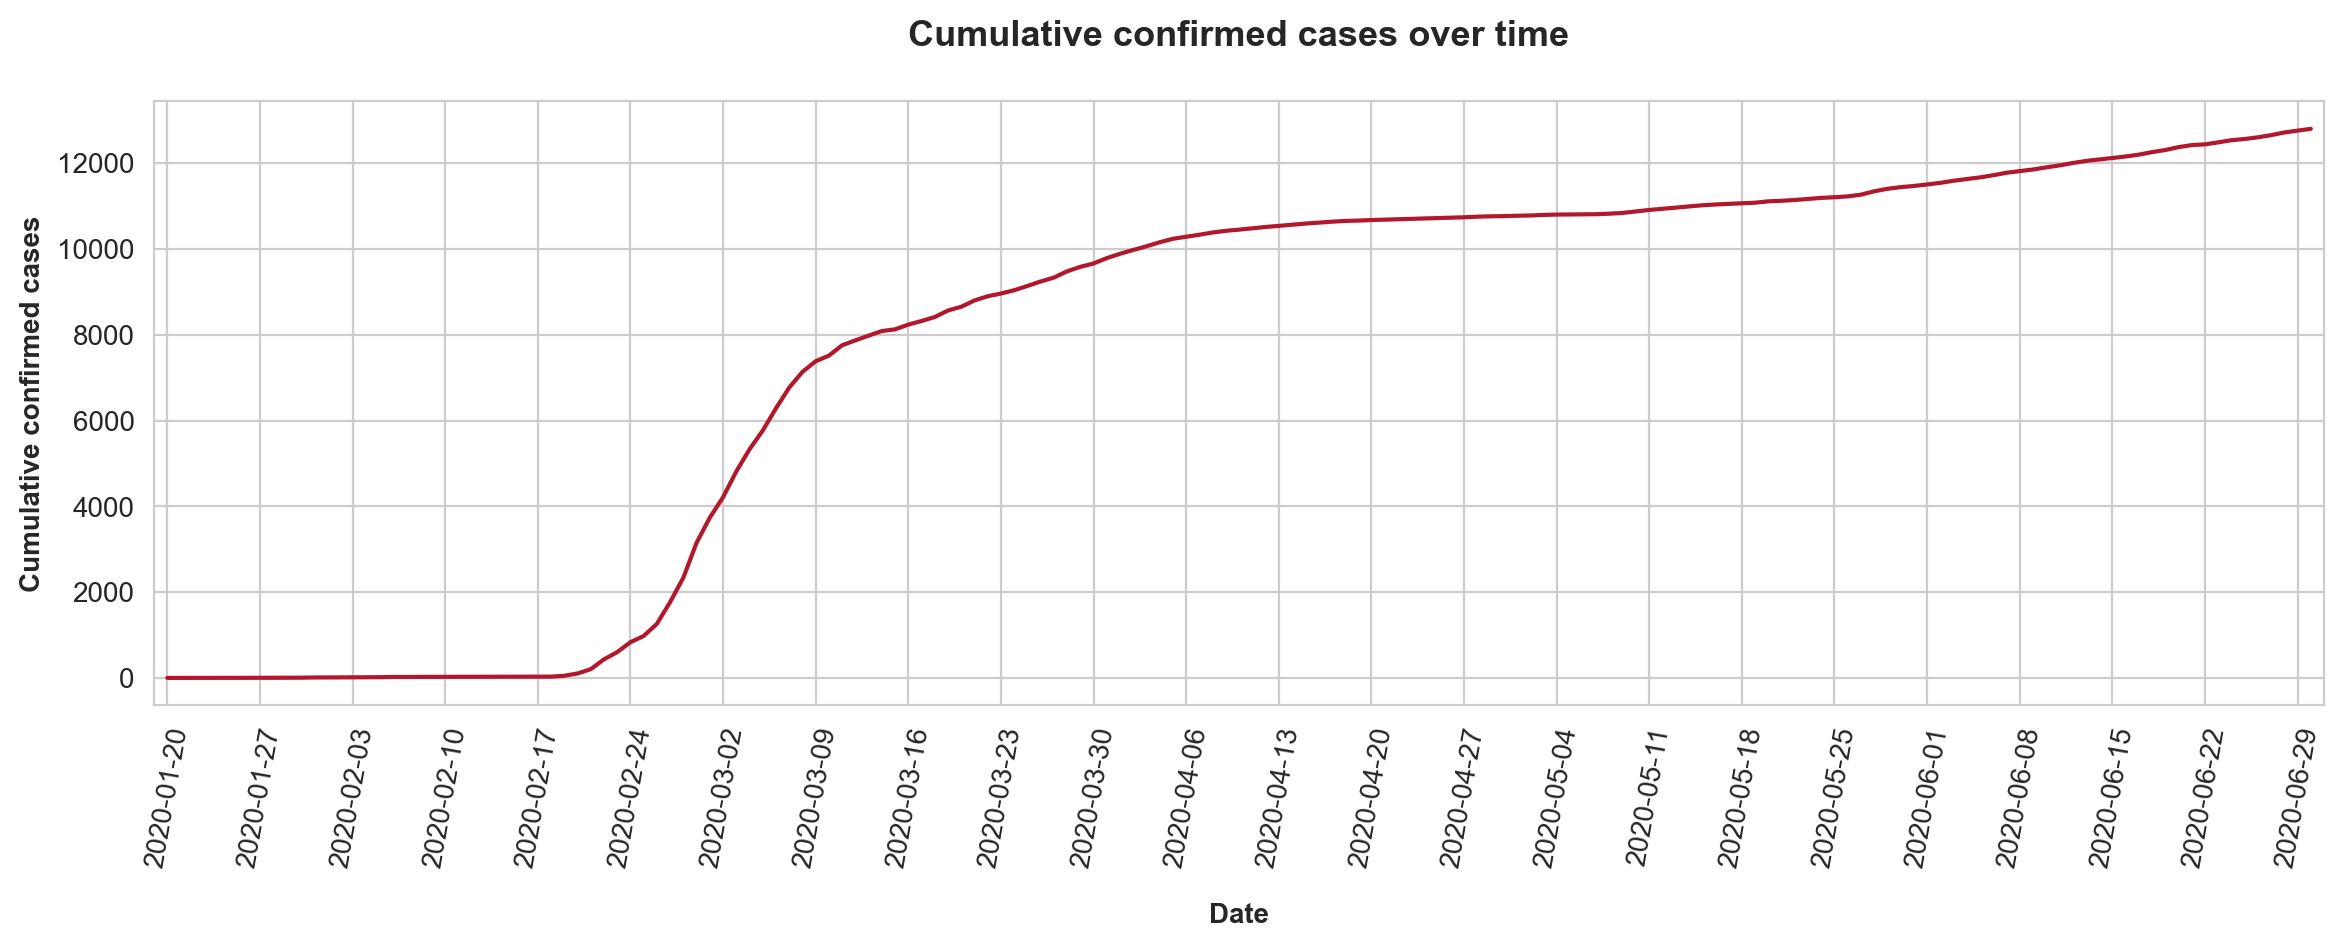

In [44]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
import datetime

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 4))

sns.lineplot(x="date", y="confirmed", data=time)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
ax.set_xlim([datetime.date(2020, 1, 19), datetime.date(2020, 7, 1)])
set_labels(
    ax, "cumulative confirmed cases over time", "date", "cumulative confirmed cases"
)

plt.xticks(rotation=80)
plt.show()

#### Insights

1. South Korea managed the pandemic well in the begining - the infection numbers were very low until the group infection in Daegu:

"*Soon after February 18, 2020, when health officials in Daegu discovered the first case of Covid-19 in the city of more than 2.4 million in southeast South Korea, the situation escalated rapidly. More than 2,000 confirmed Covid-19 cases were reported by February 29, and over 5,000 by March 7.*" (source: https://catalyst.nejm.org/doi/full/10.1056/CAT.20.0159)

2. However this graph represent cumulative numbers that makes difficult to see daily increases and decreases in infection cases.

### Daily confirmed cases

In [45]:
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaT
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaT


In [46]:
def calculate_daily_cases(df, column, initial):

    previous = initial
    daily_cases = []

    for num in range(len(df[column] + 1)):
        daily_cases.append(df[column][num] - previous)
        previous = df[column][num]

    return daily_cases

In [47]:
def mark_events(policies):

    for date_point, label, clr, y_marker in policies:
        plt.axvline(
            x=date_point, ymin=0, ymax=1, color=clr, alpha=0.5, linestyle="dashed"
        )
        plt.text(
            x=date_point,
            y=y_marker,
            s=label,
            horizontalalignment="center",
            verticalalignment="center",
            color=clr,
            alpha=1,
            fontsize=8,
            bbox=dict(facecolor="white", alpha=0.9, edgecolor="none"),
        )

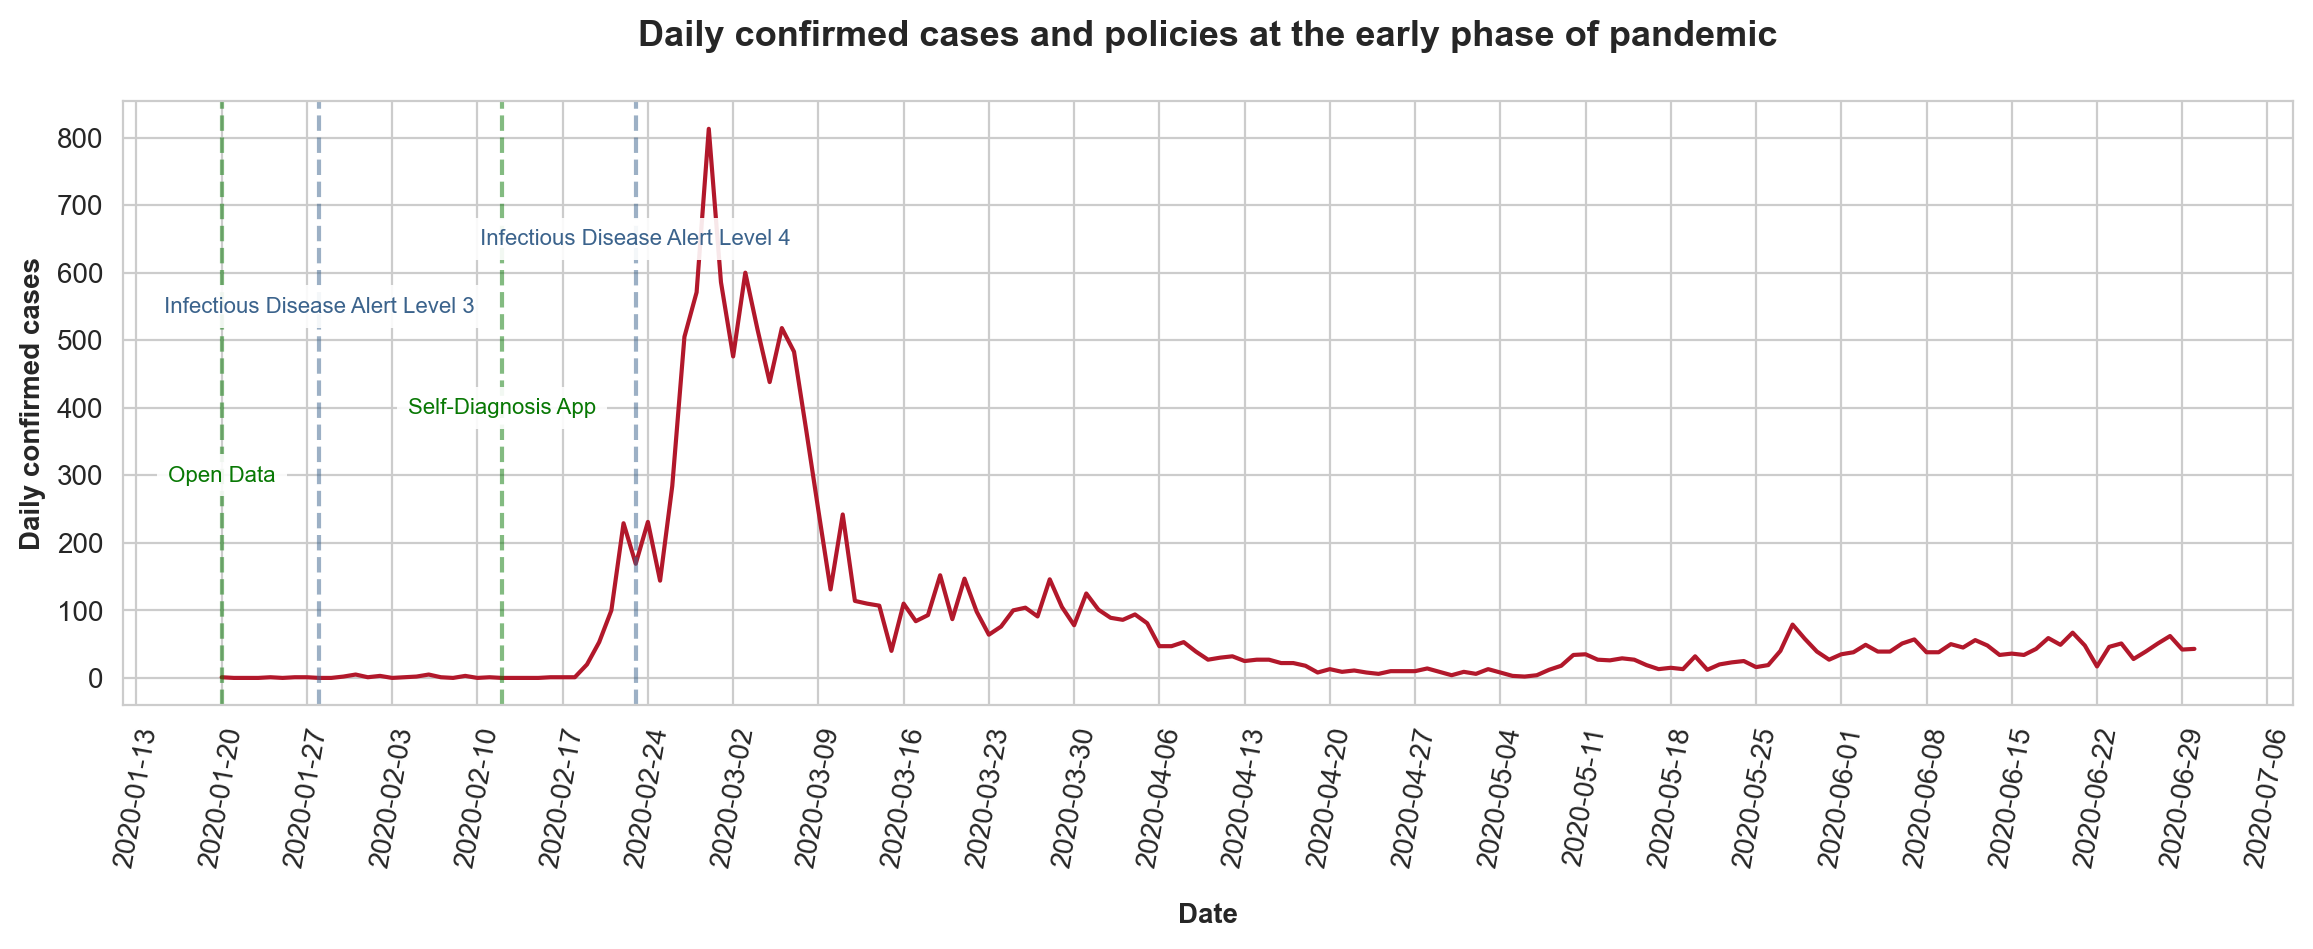

In [48]:
fig, ax = plt.subplots(figsize=(14, 4))

time["daily_confirmed"] = calculate_daily_cases(time, "confirmed", 0)

sns.lineplot(x=time["date"].dt.date, y="daily_confirmed", data=time, color="#b2182b")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
set_labels(
    ax,
    "Daily confirmed cases and policies at the early phase of pandemic",
    "date",
    "daily confirmed cases",
)

general_policies = [
    (pd.to_datetime("2020-01-20"), "Open Data", "#087804", 300),
    (pd.to_datetime("2020-02-12"), "Self-Diagnosis App", "#087804", 400),
    (pd.to_datetime("2020-01-28"), "Infectious Disease Alert Level 3", "#3b638c", 550),
    (pd.to_datetime("2020-02-23"), "Infectious Disease Alert Level 4", "#3b638c", 650),
]

mark_events(general_policies)

plt.xticks(rotation=80)
plt.show()

In [49]:
confirmed_peak = time.loc[time["daily_confirmed"].idxmax()]

confirmed_peak

date               2020-02-29 00:00:00
time                                16
test                             94055
negative                         55723
confirmed                         3150
released                            28
deceased                            17
daily_confirmed                    813
Name: 40, dtype: object

#### Insights

1. From the early phase of the pandemic, South Korea started to use technological advantages to prevent COVID-19 from spreading.

"*The travel history of patients was traced thoroughly using data such as credit card usage, CCTV, and mobile GPS to conduct environmental disinfection and identify contacts [36]. The public information disclosed containing cases’ travel history, in turn, was utilized by companies or individuals to develop the mobile contact tracing apps [39]. The contacts identified had to be self-isolated under monitoring by local governments through the mobile application or phone. During self-quarantine, if a symptom was developed newly, it was directly notified to a public officer through this application. The mobile application was used not only to monitor symptoms but also to spot locations to know whether patients comply with the rule [38].*" (source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7766828/#B40-ijerph-17-09571)

2. Even though South Korea set Infectious Disease Alert Level 3 on 12th of Feb (which restricts massive gatherings), the religious gathering in Daegu invokes the largest COVID-19 outbreak in the country with the peak of 813 confirmed cases on 29th of Feb. (source: https://preventepidemics.org/wp-content/uploads/2020/05/Annex-2_Example-of-an-alert-level-system_US_FINAL.pdf)

### Policies and their effect on most infected groups

#### Confirmed daily cased for 20 - 29 y/o age group and related policies

In [50]:
twenties_cases = time_age.loc[time_age["age"] == "20s"].copy()
twenties_cases.reset_index(inplace=True)
twenties_cases["daily_confirmed"] = calculate_daily_cases(
    twenties_cases, "confirmed", 1053
)

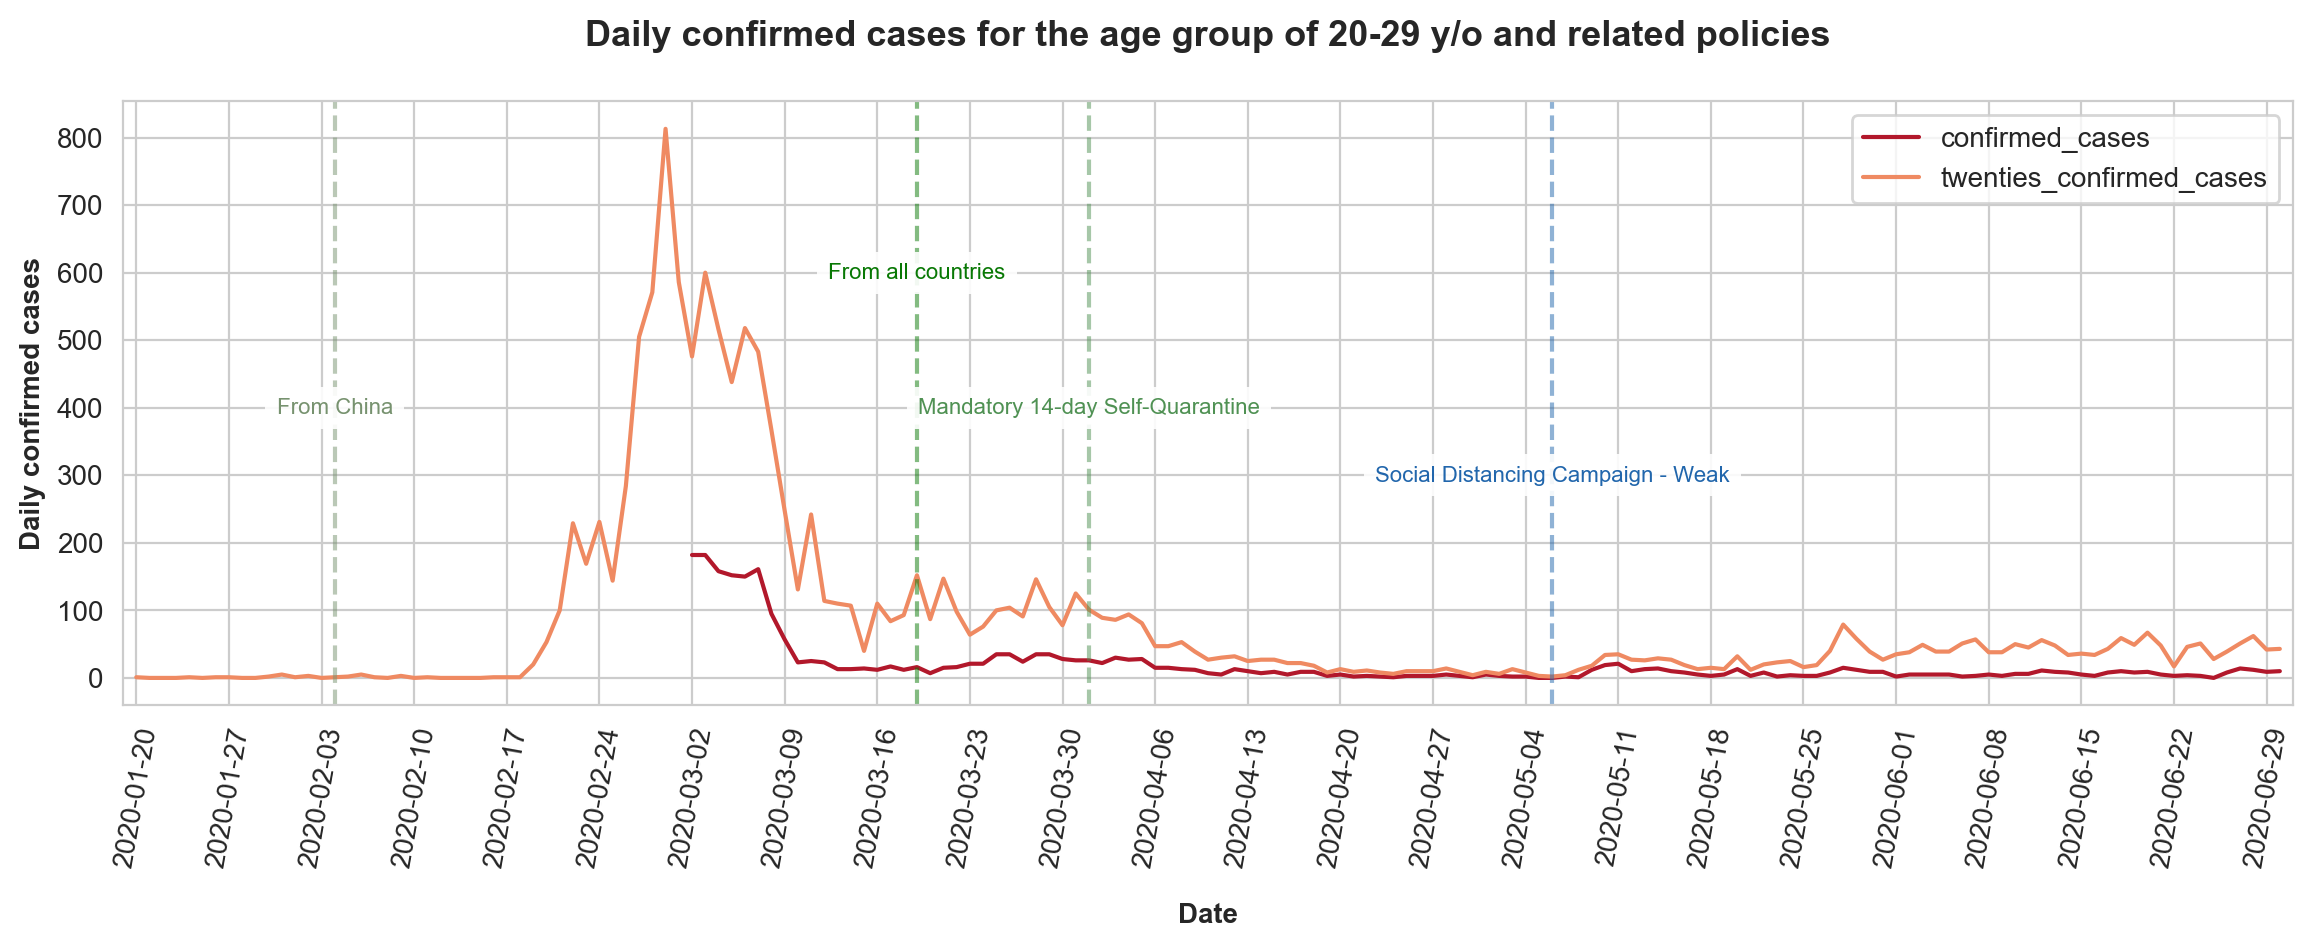

In [51]:
fig, ax = plt.subplots(figsize=(14, 4))

sns.lineplot(
    x="date",
    y="daily_confirmed",
    data=twenties_cases,
    palette=custom_palette,
    label="confirmed_cases",
)
sns.lineplot(
    x=time["date"].dt.date,
    y="daily_confirmed",
    data=time,
    palette=custom_palette,
    label="twenties_confirmed_cases",
)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
ax.set_xlim([datetime.date(2020, 1, 19), datetime.date(2020, 7, 1)])
set_labels(
    ax,
    "Daily confirmed cases for the age group of 20-29 y/o and related policies",
    "date",
    "daily confirmed cases",
)

immigration_policies = [
    (pd.to_datetime("2020-04-01"), "Mandatory 14-day Self-Quarantine", "#4f9153", 400),
    (pd.to_datetime("2020-03-19"), "From all countries", "#087804", 600),
    (pd.to_datetime("2020-05-06"), "Social Distancing Campaign - Weak", "#2166ac", 300),
    (pd.to_datetime("2020-02-04"), "From China", "#77926f", 400),
]

mark_events(immigration_policies)

plt.legend()
plt.xticks(rotation=80)
plt.show()

In [52]:
may_infection_cases = (
    patient_info.loc[patient_info["confirmed_date"].dt.strftime("%B") == "May"]
    .groupby(["infection_case"])
    .agg(count=("patient_id", "count"))
    .sort_values(by="count", ascending=False)
)

may_infection_cases.head(3)

,count
infection_case,
contact with patient,210
Itaewon Clubs,156
overseas inflow,99


#### Insight:

1. Dataset for cases by age and gender over time starts from March so development of cases for the most infected group - people in their 20s, until March is not clear
1. The drop in confirmed cases for 20s follows the same drop line as the overall confirmed cases. It might be that Infectious Disease Alert Level 4 together with immigration restrictions impacted decrease of confirmed cases for 20s.
1. It seems that 'Mandatory 14-day Self-Quarantine' policy was a final and very effective prevention measure to reduce 20s cases until minimum within given period.
1. Very interesting increase for 20s daily confirmed cases is in the beginning of May when social-distancing restrictions was weaken. The same age-group could relate with different infection causes over time.

"*May 6 - Korea starts relaxed “Distancing in Daily Life” social distancing measures;
May 8 - A cluster of cases confirmed, associated with nightclubs and restaurants visited on 2nd May in Itaewon district of Seoul [27] 
Administrative order put in place for nightlife entertainment venues asking them to refrain from opening, and for those that must open, restrictions must still be complied with. [35]*" (source: https://bmcmedicine.biomedcentral.com/articles/10.1186/s12916-020-01791-8#additional-information)

#### Confirmed daily cased for 50 - 59 y/o age group and related policies

In [53]:
fifties_cases = time_age.loc[time_age["age"] == "50s"].copy()
fifties_cases.reset_index(inplace=True)
fifties_cases["daily_confirmed"] = calculate_daily_cases(
    fifties_cases, "confirmed", 716
)

In [54]:
female_cases = time_gender.loc[time_gender["sex"] == "female"].copy()
female_cases.reset_index(inplace=True)
female_cases["daily_confirmed"] = calculate_daily_cases(female_cases, "confirmed", 2240)

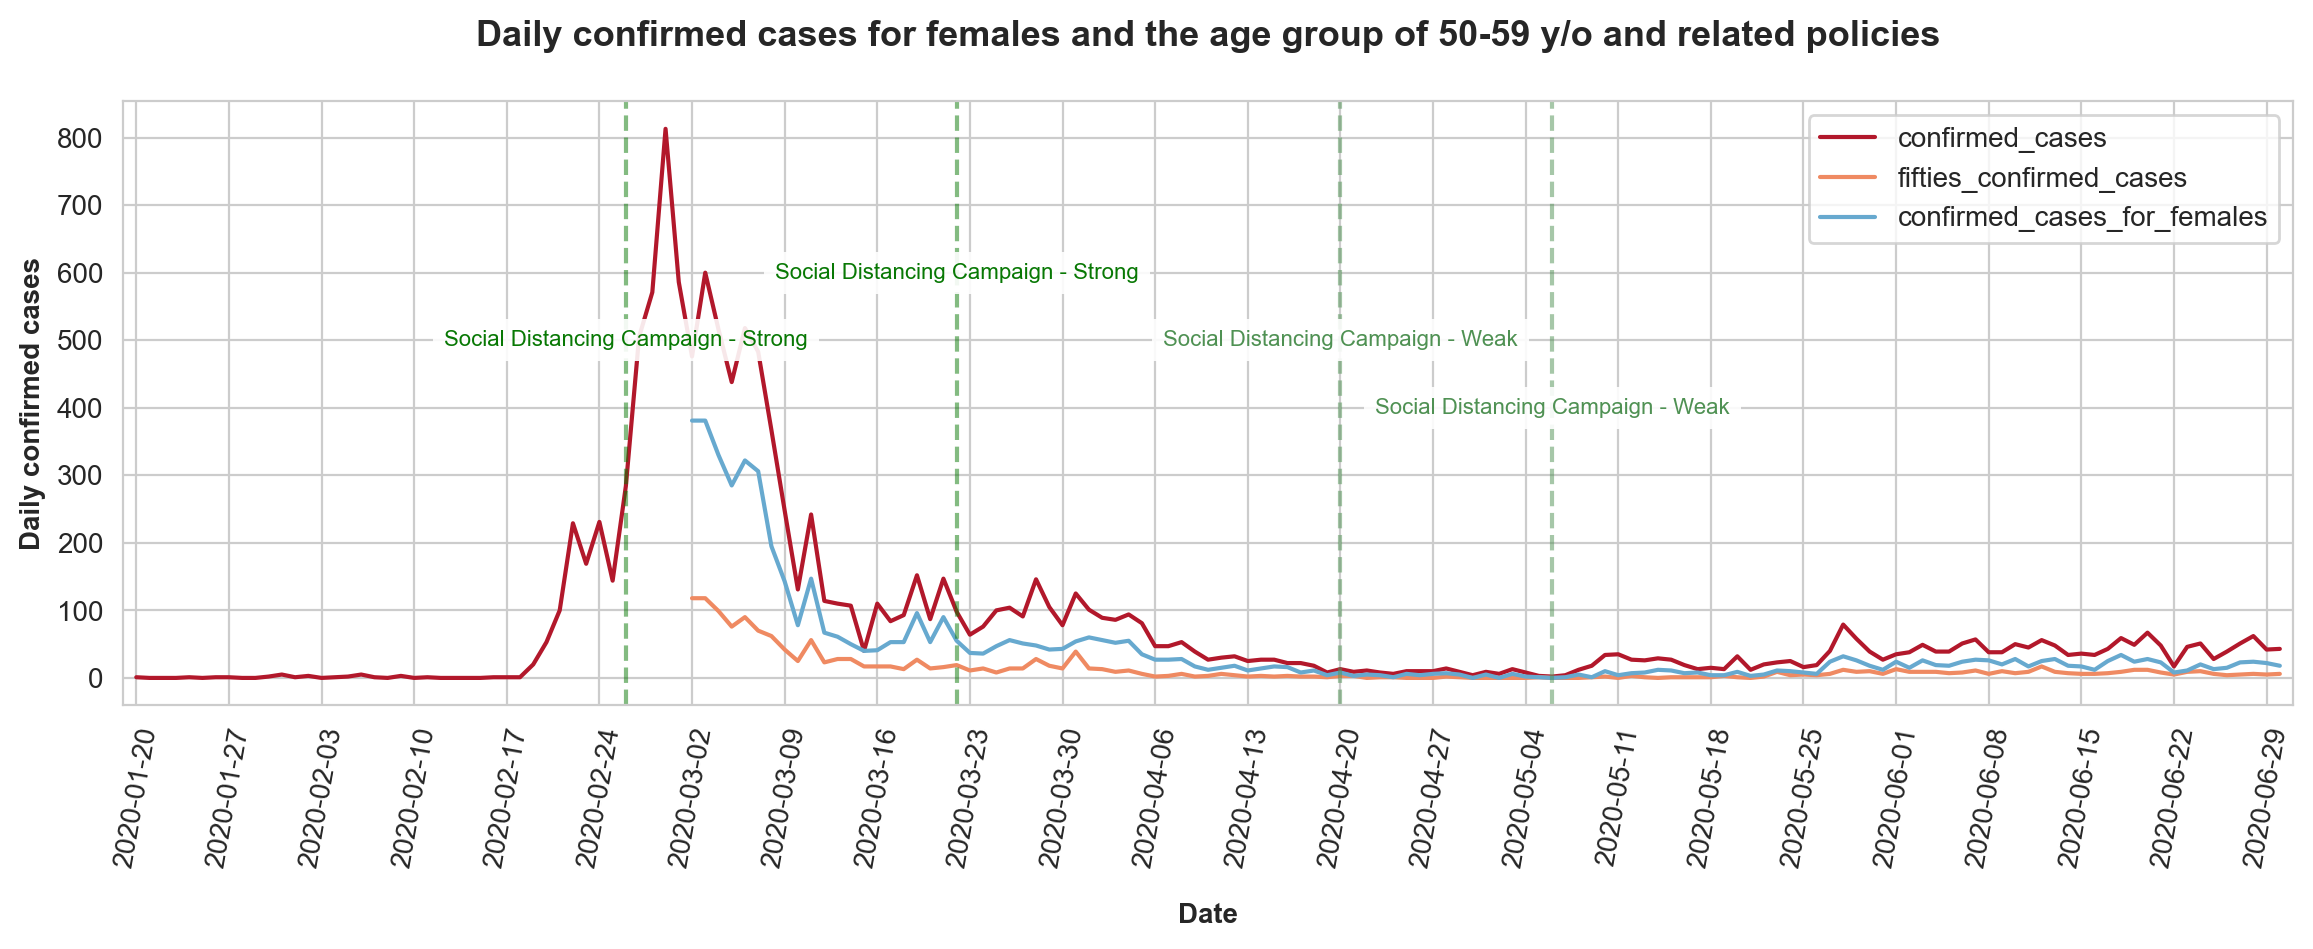

In [55]:
fig, ax = plt.subplots(figsize=(14, 4))

sns.lineplot(
    x=time["date"].dt.date,
    y="daily_confirmed",
    data=time,
    palette=custom_palette,
    label="confirmed_cases",
)
sns.lineplot(
    x="date",
    y="daily_confirmed",
    data=fifties_cases,
    palette=custom_palette,
    label="fifties_confirmed_cases",
)
sns.lineplot(
    x="date",
    y="daily_confirmed",
    data=female_cases,
    palette=custom_palette,
    label="confirmed_cases_for_females",
)
set_labels(
    ax,
    "Daily confirmed cases for females and the age group of 50-59 y/o and related policies",
    "date",
    "daily confirmed cases",
)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
ax.set_xlim([datetime.date(2020, 1, 19), datetime.date(2020, 7, 1)])

social_policies = [
    (
        pd.to_datetime("2020-02-26"),
        "Social Distancing Campaign - Strong",
        "#087804",
        500,
    ),
    (
        pd.to_datetime("2020-03-22"),
        "Social Distancing Campaign - Strong",
        "#087804",
        600,
    ),
    (pd.to_datetime("2020-04-20"), "Social Distancing Campaign - Weak", "#4f9153", 500),
    (pd.to_datetime("2020-05-06"), "Social Distancing Campaign - Weak", "#4f9153", 400),
]

mark_events(social_policies)

plt.xticks(rotation=80)
plt.show()

#### Insights

1. Datasets for cases by age and gender over time starts from March so development of cases for one of the most infected groups - female in their 50s, until March is not clear
1. The drop in confirmed cases for females follows the same drop line as the overall confirmed cases. Infectious Disease Alert Level 4 together with Strong Social Distancing Campaign highly impacted decrease of confirmed cases for females at their 50s.
1. Cases for females starts to grow around the end of May. At that time schools started to re-open. 

***

## Conclusion and plan

1. Two groups with the most infected cases are identified:
    - people in their 20s
    - female in their 50s   
 
    Both groups represent different primary causes of infection:
    - the leading cause for infection in patients in their 20s is overseas inflow
    - the leading cause for infection in female patients in their 50s is contact with patients        
    
     Assumptions:
    - people in their 20s travel for work or studies
    - females in their 50s work in people-facing areas, such as hospitals, schools, nursing homes, etc.

    Both most infected groups should be advised on actions as early as possible and protection measures should be applied: educating about symptoms, mandatory wearing of masks, informing about nearest screening centers and telephone hotlines, etc.

    It would be useful to go deeper and understand if assumptions about the background of the most infected groups are correct so that patients would be advised accordingly.
    

2. The most common caused of infections: overseas inflow and contact with patients should be monitored closely and prioritized when setting up restrictions.
    - South Korea put policies on Social Distancing from an early phase of pandemic. However Immigration policies were applied country by country over time.   


3. 524 out of 688 patients (76%) have more than one day period from symptoms appearing to case confirmation.
    - The plan should include more thorough data gathering about symptoms over time
    - It is also important to communicate clearly what actions need to be taken from patient perspective as soon as they notice the first symptoms
   
   
4. Group infections have the biggest effect on the number of infections. Infection cases were arranged together to create high risk areas for group infections.
    - During pandemic high risk areas should be monitored closely and should be prioritized when setting up restrictions. It is also helpful to take into account which areas are most risky for each province and apply restrictions by province.
    - Also it is not enough just to put restrictions or simply close high risk sites, such as churces. A plan should include actions on how to replace or fill the gap so that people have all what is required to stay at home and maintain regular life (for example, church services on TV, phone or video call with pastor)
    
    
5. South Korea started aplying policies as early as first cases were confirmed. This allowed to quickly manage the outbreaks. This strategy works and should be adopted in the future.

6. When pandemic started, South Korea implemented technological solution for case tracing quickly. Although it raised the concerns of human rights, the public could avoid visiting affected places and self-isolate effectively. 

    This strategy works and should be adopted in the future but could be improved to include additional data, such as symptoms, age, gender, vaccination status. This would allow to develop efficient communication strategies.
